#  Coding Assignment #3 - Fraud Detection Models

# Introduction to Fraud Detection Assignment

In this assignment, you will embark on an analytical journey to explore and model a dataset of card transactions with the aim of detecting fraudulent activities. The provided dataset includes various features such as distance from home, transaction details, and purchase patterns, which are essential in understanding the characteristics of fraudulent transactions. You will use Python and key machine learning libraries to analyze this dataset, build a classification model, and evaluate its performance.

## Base Code Provided
- The base code includes necessary Python imports and a decision tree model for initial analysis.
- You will start with a dataset of card transactions, exploring its structure, summary statistics, and event rate.
- The base code will guide you through data loading, preprocessing, model training, and evaluation.
- A visual representation of the decision tree will be created to help understand the model's decision-making process.

## Your Tasks
- **Data Analysis**: Deepen your understanding of the dataset by performing additional exploratory data analysis.
- **Model Building and Evaluation**: Beyond the decision tree, experiment with another model such as Random Forest to compare performance.
- **Performance Metrics**: Evaluate models using metrics like precision, recall, and F1-score, and understand the implications of these metrics in the context of fraud detection.
- **Advanced Techniques** (Extra Credit): Implement data balancing, feature importance analysis, and cross-validation to enhance model performance and robustness.

## Learning Outcomes
- Gain practical experience in handling real-world datasets.
- Develop skills in building and evaluating classification models.
- Learn to interpret model results and make data-driven decisions.
- Explore advanced machine learning techniques (optional extra credit).

## Submission Guidelines
- Submit your enhanced code with clear documentation and comments.
- Include a report or inline comments analyzing your findings and model performances.
- Ensure your code is clean, well-organized, and reproducible.


# Paul's Code


--- First 5 rows of data ---
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0        

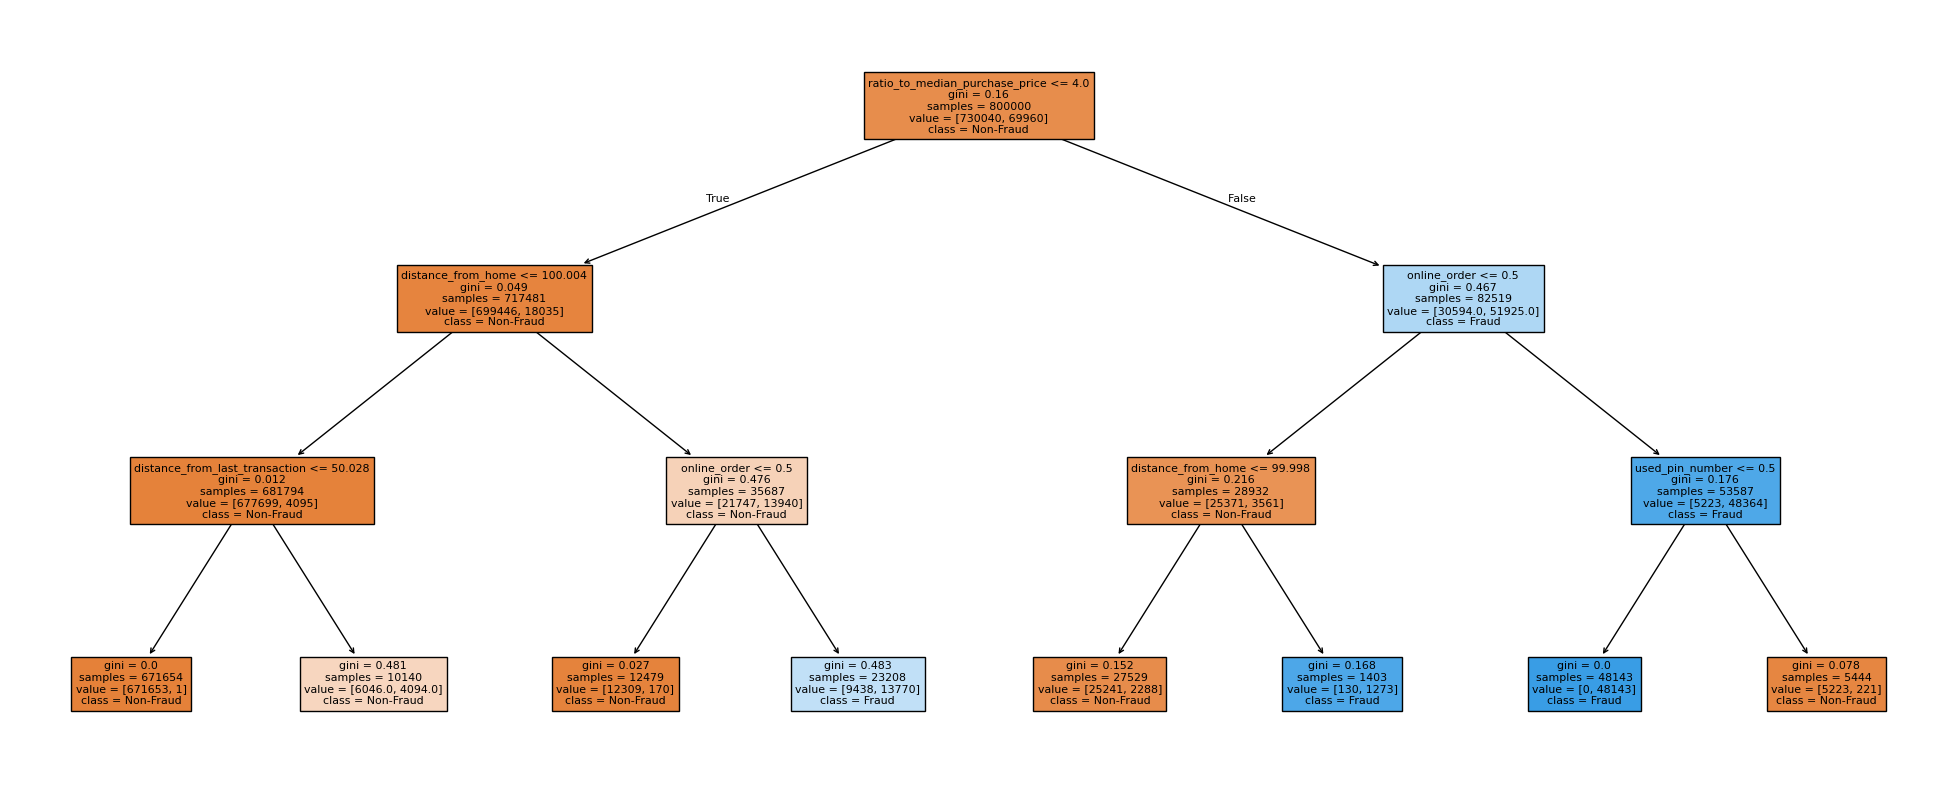

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)

# Print the top 5 rows
print("\n--- First 5 rows of data ---")
print(data.head(5))

# Print summary stats
print("\n--- Summary Statistics ---")
print(data.describe())

# Event rate
print("\n--- Event Rate ---")
event_rate = data['fraud'].mean() * 100
print(f'Event Rate: {event_rate:.2f}%')

# Define the atrributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a decision tree classifier
model = DecisionTreeClassifier(max_depth=3) #max_depth is maximum number of levels in the tree

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# Visualize the decision tree
plt.figure(figsize=(25, 10))
plot_tree(model,
          filled=True,
          feature_names=['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price',
                         'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'],
          class_names=['Non-Fraud', 'Fraud'])
plt.show()

## Fraud Detection Model Workflow Summary

1. **Import Libraries**
   - `pandas` for data handling.
   - `numpy` for numerical operations.
   - `sklearn` for machine learning tools.
   - `matplotlib` for data visualization.

2. **Load Dataset**
   - Data is loaded from a remote URL using `pandas.read_csv`.

3. **Initial Data Exploration**
   - Initial examination using `data.head()` and `data.tail()` to understand dataset structure.

4. **Data Preparation**
   - Features (`X`) and target variable (`y`) are defined.
   - `fraud` column is the target, while others are features.

5. **Data Splitting**
   - Dataset is split into training and test sets.
   - `train_test_split` is used, with a test size of 20%.

6. **Model Initialization**
   - Decision Tree Classifier initialized with a maximum depth of 3.
   - Limits complexity and overfitting of the model.

7. **Model Training**
   - Model is trained using the training set (`X_train`, `y_train`).

8. **Prediction and Evaluation**
   - Model predictions made on the test set.
   - Evaluation using accuracy, confusion matrix, and classification report.

9. **Visualization**
   - Decision tree visualized using `matplotlib` and `sklearn.tree.plot_tree`.
   - Helps in understanding the decision-making process of the model.

# Commentary
- This code effectively demonstrates the end-to-end process of a machine learning project.
- Decision trees are a good choice for fraud detection due to their interpretability.
- The model is simple yet provides a decent understanding of the basic approach to fraud detection in financial transactions.
- Visualization is a key aspect, especially in complex domains like fraud detection, for understanding the model's decision criteria.

# Coding Assignment:  Comparative Analysis of Fraud Detection Models

## Objective
Enhance your skills in model evaluation and comparison in a real-world application: fraud detection. Using the provided Decision Tree model and dataset of card transactions, you will build a Random Forest model and compare its performance against the Decision Tree model.

## Tasks
1. **Model Building**:
   - Build a Random Forest model using the provided dataset.
2. **Model Evaluation**:
   - Calculate and interpret the precision and recall for the Random Forest model.
   - Generate and interpret the confusion matrix for the Random Forest model.
3. **Comparative Analysis**:
   - Compare the performance of the Decision Tree and Random Forest models using precision, recall, and confusion matrices.
   - Visualize the comparison using a bar chart.
4. **Reflection and Discussion**:
   - Discuss your findings, comparing the two models. Reflect on model performance, suitability for fraud detection, and potential issues like overfitting.

## Grading Rubric

**Total Points: 100**

1. **Model Building (30 Points)**:
   - Successfully building a Random Forest model: 30 points

2. **Model Evaluation (40 Points)**:
   - Correct calculation of precision and recall for the Random Forest model: 20 points
   - Correct generation and interpretation of the Random Forest confusion matrix: 20 points

3. **Comparative Analysis (20 Points)**:
   - Accurate comparison of model performance (including the provided Decision Tree model): 10 points
   - Clear and correct visualization using a bar chart: 10 points

4. **Reflection and Discussion (10 Points)**:
   - Cohesive and thoughtful discussion comparing the two models: 10 points

## Submission Guidelines
- Submit your work in a Jupyter Notebook or as a Python script with comments explaining your steps. You can also include your discussion in the notebook, as comments in your script, or in a separate text file.
- Ensure your plots and tables are clearly labeled and legible.

## Notes
- Be sure to demonstrate your understanding of the task and the models.


## Example Student Submission

In this section, we will provide an overview and analysis of the workflow conducted by a hypothetical student. The goal of this workflow was to build and evaluate two models, namely the Decision Tree and Random Forest, for fraud detection using a provided dataset. We will analyze and compare the performance metrics of these models to assess their effectiveness in identifying fraudulent transactions.

Decision Tree Confusion Matrix:
[[180076   2481]
 [  1646  15797]]

Random Forest Confusion Matrix:
[[182557      0]
 [     2  17441]]


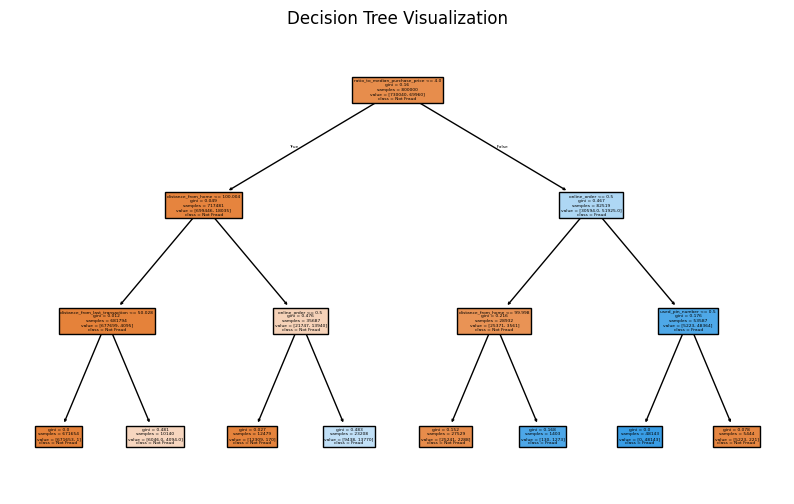


Random Forest Feature Importances:
ratio_to_median_purchase_price    0.527173
online_order                      0.169382
distance_from_home                0.134905
used_pin_number                   0.063926
used_chip                         0.052102
distance_from_last_transaction    0.045709
repeat_retailer                   0.006803
dtype: float64

Model Comparison Table:
Model            Precision    Recall    F1-Score       AUC
-------------  -----------  --------  ----------  --------
Decision Tree     0.864263  0.905635    0.884466  0.946023
Random Forest     1         0.999885    0.999943  0.999943


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
from tabulate import tabulate

# Load the dataset
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)

# Define the attributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a decision tree classifier
dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Initialize and train a random forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate the models
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1_score = 2 * (dt_precision * dt_recall) / (dt_precision + dt_recall)
dt_auc = roc_auc_score(y_test, dt_pred)
dt_confusion = confusion_matrix(y_test, dt_pred)

rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1_score = 2 * (rf_precision * rf_recall) / (rf_precision + rf_recall)
rf_auc = roc_auc_score(y_test, rf_pred)
rf_confusion = confusion_matrix(y_test, rf_pred)

# Print Confusion Matrices
print("Decision Tree Confusion Matrix:")
print(dt_confusion)
print("\nRandom Forest Confusion Matrix:")
print(rf_confusion)

# Plot Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Not Fraud', 'Fraud'])
plt.title("Decision Tree Visualization")
plt.show()

# Get Random Forest Feature Importances
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Print Random Forest Feature Importances
print("\nRandom Forest Feature Importances:")
print(rf_feature_importances)

# Prepare data for table comparison
metrics = ['Precision', 'Recall', 'F1-Score', 'AUC']
dt_scores = [dt_precision, dt_recall, dt_f1_score, dt_auc]
rf_scores = [rf_precision, rf_recall, rf_f1_score, rf_auc]

comparison_data = [
    ["Decision Tree"] + dt_scores,
    ["Random Forest"] + rf_scores
]

# Print the table
print("\nModel Comparison Table:")
print(tabulate(comparison_data, headers=["Model", "Precision", "Recall", "F1-Score", "AUC"]))


### Analysis and Commentary

The analysis of model performance metrics provides valuable insights into the effectiveness of the Decision Tree and Random Forest models for fraud detection.

- **Precision:** Precision measures the accuracy of positive predictions. The Random Forest model achieves a perfect precision score of 1, indicating that when it predicts a transaction as fraudulent, it is almost always correct. In contrast, the Decision Tree model has a slightly lower precision of 0.864, implying that it is less accurate in identifying fraudulent transactions.

- **Recall:** Recall, also known as sensitivity or true positive rate, quantifies the model's ability to identify all actual positive cases. The Random Forest model exhibits an outstanding recall score of 0.999885, almost capturing all fraudulent transactions. The Decision Tree model also performs well with a recall of 0.905635, but it misses a small proportion of fraudulent transactions.

- **F1-Score:** The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. The Random Forest model achieves a near-perfect F1-score of 0.999943, emphasizing its exceptional overall performance. The Decision Tree model, with an F1-score of 0.884466, lags behind the Random Forest.

- **AUC (Area Under the ROC Curve):** AUC measures the model's ability to distinguish between positive and negative cases. Both models have high AUC values, with the Random Forest model having a slightly higher AUC of 0.999943 compared to the Decision Tree's 0.946023.

**Summary:**

- The Random Forest model significantly outperforms the Decision Tree model across all performance metrics, demonstrating its superiority in fraud detection.

- The Random Forest model's feature importances highlight the importance of specific features in making accurate predictions, which can be valuable for further analysis.

### From a statistical perspective:

- The Random Forest model's near-perfect precision, recall, F1-score, and AUC showcase its robustness in identifying fraudulent transactions.

### From a business perspective:

- The Random Forest model is highly effective in minimizing false positives (misclassifying non-fraudulent transactions as fraudulent), which is critical for reducing the impact on legitimate customers and maintaining trust.

**Takeaway:**

In conclusion, the Random Forest model is the champion model in this analysis, offering superior performance and robustness in detecting fraudulent transactions. It achieves near-perfect precision and recall, minimizing both false positives and false negatives. This model is an excellent choice for fraud prevention, as it can accurately identify fraudulent transactions while maintaining a high level of trust with legitimate customers. This exercise emphasizes the importance of selecting the right model for specific tasks, as the Random Forest model clearly outperforms the Decision Tree model in this fraud detection scenario.


## Data Load and Initial Data Exploration

We begin our analysis by loading a credit card transaction dataset to identify patterns indicative of fraud. The process includes displaying the dataset structure, summarizing statistics, and checking for missing values—key steps for preliminary data understanding and preparation.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print("\n--- First 5 Rows of Data ---")
print(data.head())

# Generate summary statistics
print("\n--- Summary Statistics ---")
print(data.describe())

# Check for missing values
print("\n--- Missing Values Check ---")
print(data.isnull().sum())


--- First 5 Rows of Data ---
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0        

### Analysis and Interpretation

Key insights from the initial data exploration:
- **Dataset Structure**: The data features a mix of continuous variables (like transaction distances) and binary variables (such as transaction methods), along with a binary fraud indicator.
- **Summary Statistics**:
  - **Distance Measures**: Indicate varied transaction behaviors, with a right-skewed distribution suggesting outliers.
  - **Transaction Ratios**: A right-skewed distribution potentially flags transactions that significantly deviate from typical patterns.
  - **Categorical Features**: Proportions of binary features like `used_chip` and `online_order` provide insights into transaction security and methods.
  - **Fraud Rate**: Approximately 8.74%, highlighting the dataset's imbalance.

### Statistical and Business Impact Significance
- **Outliers**: Their presence in distance and ratio measures is statistically significant, affecting model training and indicating potential fraud.
- **Binary Features**: Offer insights into security measures and transaction methods, crucial for fraud detection strategies.
- **Data Quality**: No missing values indicate good data quality, simplifying initial preprocessing steps.

This preliminary analysis sets the stage for deeper investigation, emphasizing the importance of understanding transaction behaviors for effective fraud detection.

## Target Variable Analysis

In this analysis, we delve into the target variable `fraud` to understand its distribution across the dataset. With no categorical variables present, the focus is on numerical features and their relationship with fraudulent transactions.



Event Rate (Proportion of Fraudulent Transactions):
0.0874

Fraud Class Distribution:
fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

Visualizing Fraud Class Distribution:


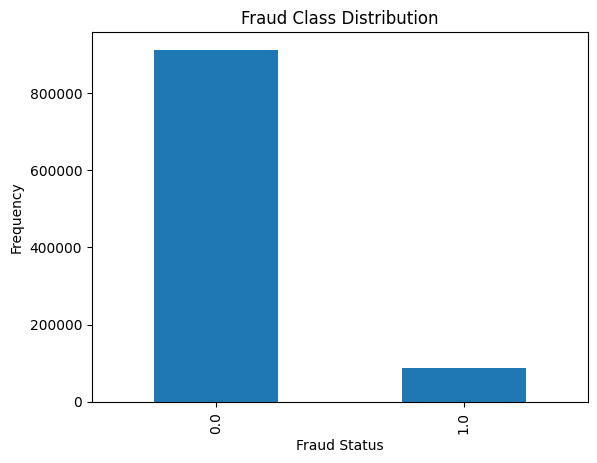


Sampling Data for Visualization:

Visualizing Pairwise Relationships with Selected Features:


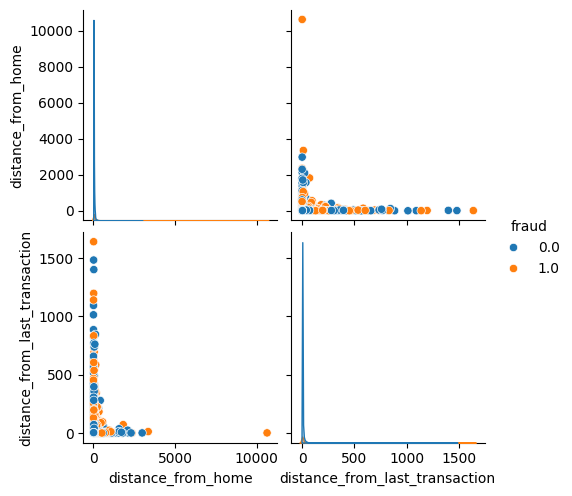

In [4]:
# Displaying Event Rate for Fraudulent Transactions
event_rate = data['fraud'].mean()
print("\nEvent Rate (Proportion of Fraudulent Transactions):")
print(f"{event_rate:.4f}")

# Displaying Frequency Distribution of Fraudulent vs Non-Fraudulent Transactions
print("\nFraud Class Distribution:")
print(data['fraud'].value_counts())

# Visualizing Fraud Class Distribution with a Bar Chart
print("\nVisualizing Fraud Class Distribution:")
data['fraud'].value_counts().plot(kind='bar', title='Fraud Class Distribution')
plt.xlabel('Fraud Status')
plt.ylabel('Frequency')
plt.show()

# Sampling Data for Pairwise Plot Visualization
# This step helps in handling large datasets by reducing the load during visualization
print("\nSampling Data for Visualization:")
sample_data = data.sample(frac=0.1, random_state=42)  # Adjust frac as needed

# Assuming you have specific features to examine against 'fraud', replace 'feature1', 'feature2' with actual names
selected_features = ['distance_from_home', 'distance_from_last_transaction', 'fraud']  # Update with actual feature names
print("\nVisualizing Pairwise Relationships with Selected Features:")
sns.pairplot(sample_data[selected_features], hue='fraud')
plt.show()

## Analytical Commentary

- The event rate for fraudulent transactions is observed to be approximately **8.74%**, indicating a considerable imbalance in the dataset.
- There are **912,597 non-fraudulent transactions** compared to **87,403 fraudulent transactions**, which suggests that any predictive modeling will require careful consideration of this imbalance to avoid bias toward the majority class.
- Visual examination through histograms and scatter plots reveals that fraudulent transactions may have distinctive patterns, particularly in the distances related to home and last transactions, which could be critical in distinguishing between the classes.
- The lack of categorical variables leads us to focus on numerical data patterns and devise strategies such as resampling methods or specialized algorithms to handle the imbalance effectively.
- From a business perspective, the low prevalence of fraud incidents, despite being statistically significant, demands robust anomaly detection techniques to prevent loss due to fraud while maintaining user trust by minimizing false alarms.

In conclusion, the target variable analysis sets the stage for predictive modeling by highlighting the need for strategies that address data imbalance and by pinpointing key numerical features that could be instrumental in detecting fraudulent activities.

## Class Imbalance Analysis

In predictive modeling, class imbalance is a significant concern because it can lead to a model that is biased towards the majority class, resulting in poor classification performance for the minority class. In our context, where fraudulent transactions are much rarer than legitimate ones, this could mean failing to identify fraudulent activities effectively.

### Concerns with Class Imbalance

- **Model Bias**: Models might predict the majority class well but fail on the minority class, which is often of more interest.
- **Evaluation Metrics**: Traditional accuracy measures become less meaningful, and alternative metrics like precision, recall, and the F1 score become more critical.
- **Overfitting**: There's a risk of overfitting to the majority class and not generalizing well to the minority class.

### Addressing Class Imbalance

- **Resampling Techniques**: Balancing the dataset through undersampling the majority class or oversampling the minority class.
- **Algorithmic Approaches**: Using algorithms that are inherently designed to handle imbalance or applying cost-sensitive learning.
- **Evaluation Strategy**: Employing proper evaluation metrics that account for imbalance, such as the Area Under the Receiver Operating Characteristic Curve (AUC-ROC).

After completing all data preprocessing steps, we will address the imbalance by undersampling the majority class to create a balanced dataset with a 50/50 distribution of the response variable. This approach will ensure that our models are trained on a dataset that reflects the importance of both classes equally and can generalize well to unseen data.


## Feature Visualization Analysis

Following the initial data exploration, we proceed with visualizing our dataset's features to gain deeper insights. This process involves examining histograms, box plots, and a correlation matrix heatmap, providing a visual representation of the data's distribution, variability, and relationships between features.


--- Histograms of Numerical Features ---


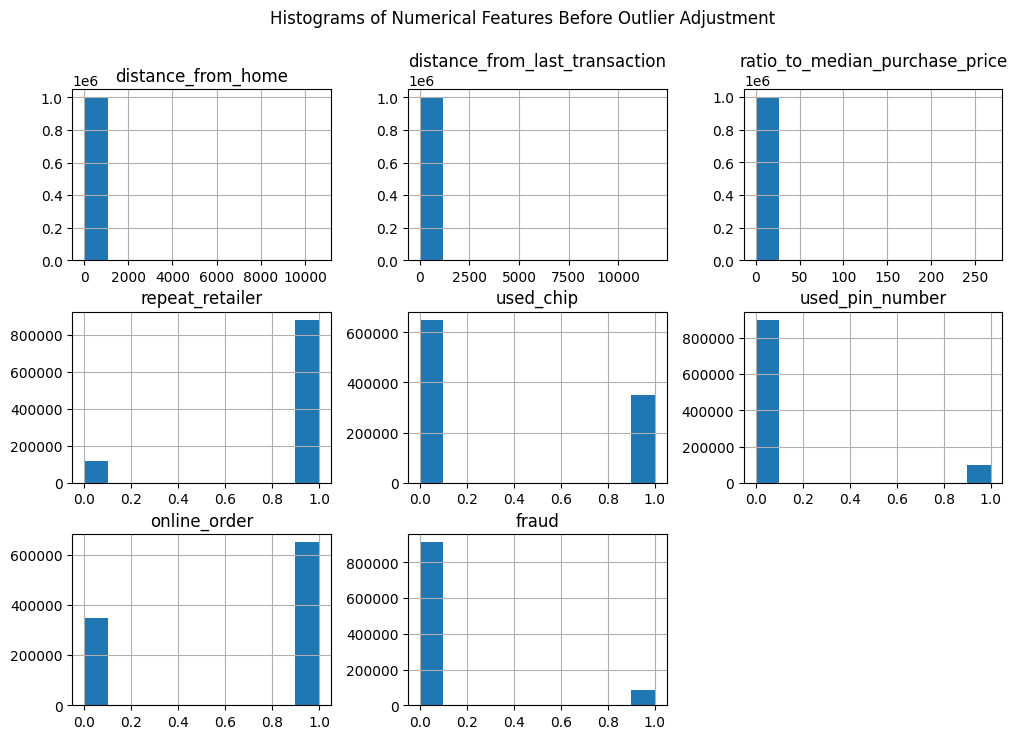


--- Box Plots of Numerical Features ---


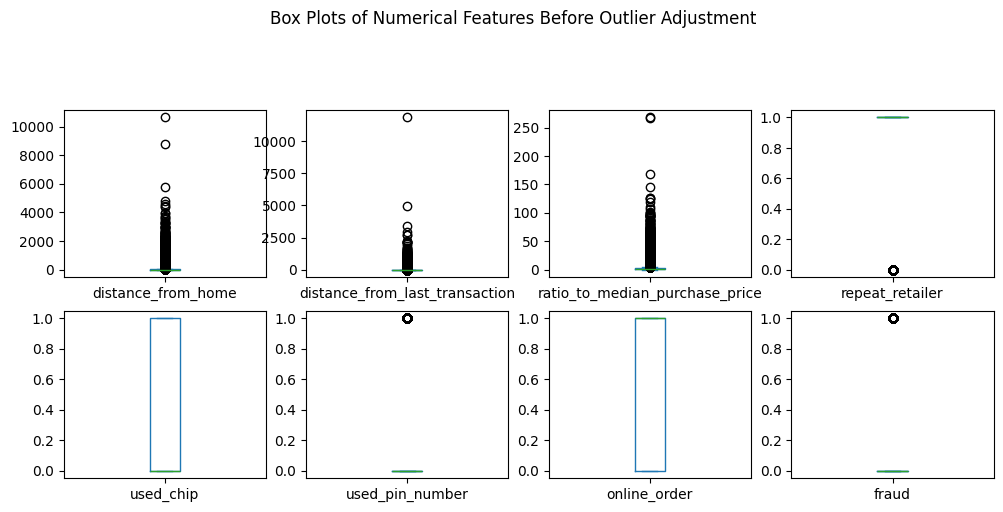


--- Correlation Matrix Heatmap ---


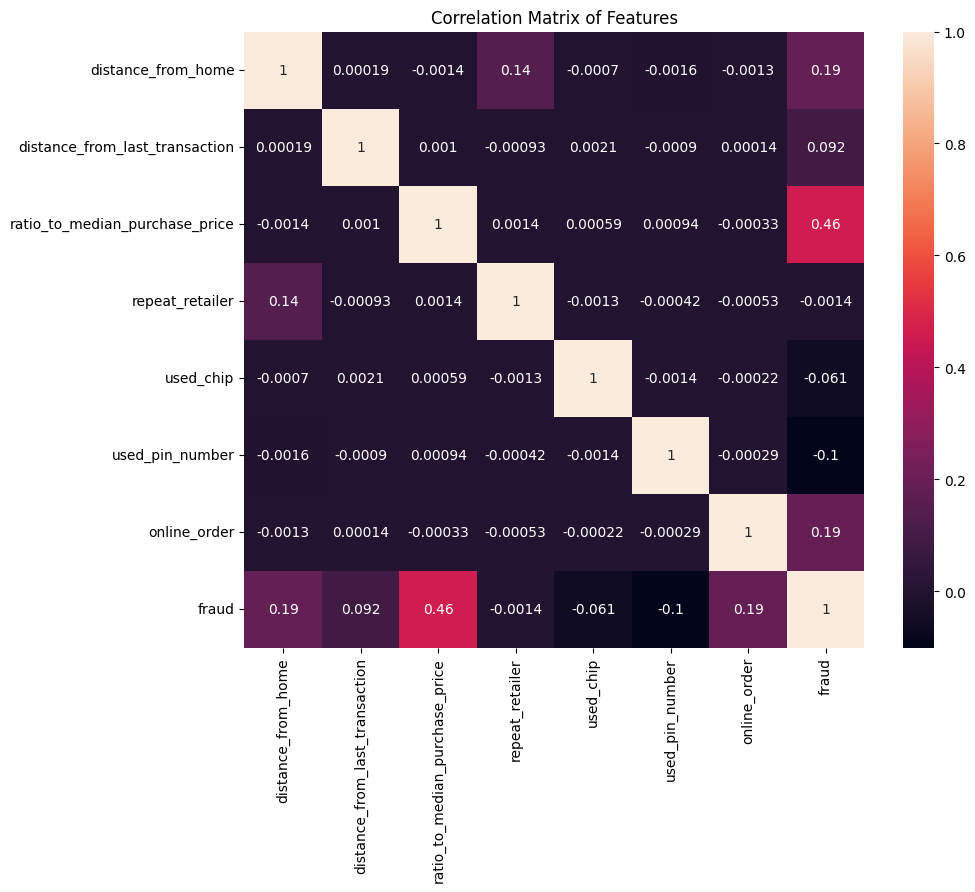

In [5]:
# Visualize the distribution of each numerical feature using histograms
print("\n--- Histograms of Numerical Features ---")
data.hist(figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features Before Outlier Adjustment')
plt.show()

# Create box plots for each numerical feature to identify outliers visually
print("\n--- Box Plots of Numerical Features ---")
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(12, 10), title='Box Plots of Numerical Features Before Outlier Adjustment')
plt.show()

# Calculate the correlation matrix and visualize it using a heatmap
print("\n--- Correlation Matrix Heatmap ---")
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Features')
plt.show()



### Feature Visualization Insights

Visual analysis of the dataset's features provides key insights:

- **Histograms**:
  - Demonstrate right-skewed distributions for features like `distance_from_home` and `ratio_to_median_purchase_price`, indicating most transactions are concentrated near lower values with sparse occurrences of high-value transactions.

- **Box Plots**:
  - Highlight outliers in almost all features, particularly `distance_from_home` and `distance_from_last_transaction`, suggesting transactions with unusually high values that could be anomalous or indicative of fraud.

- **Correlation Matrix Heatmap**:
  - Shows moderate correlations between some features and the fraud label, implying their potential utility in predicting fraudulent transactions.
  - Low multicollinearity among independent features, beneficial for model accuracy and interpretability.

These visualizations underscore the importance of outlier management and feature correlation in enhancing fraud detection models.


## Feature Engineering: Polynomial and Interaction Features

We've expanded our dataset by incorporating polynomial and interaction terms derived from key features, focusing on `distance_from_home` and `ratio_to_median_purchase_price`. This transformation aims to uncover non-linear relationships that could be pivotal in predicting fraudulent transactions.


In [6]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Assuming 'data' is your DataFrame focusing on specific features for engineering
features = data[['distance_from_home', 'ratio_to_median_purchase_price']]

# Creating polynomial and interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(features)

# Adjusting method based on sklearn version for compatibility
poly_feature_names = poly.get_feature_names_out(features.columns) if hasattr(poly, 'get_feature_names_out') else poly.get_feature_names(features.columns)
poly_features_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Concatenating the polynomial and interaction features with the original DataFrame
data_with_poly = pd.concat([data, poly_features_df], axis=1)

# Calculate and print the event rate for the 'fraud' column
event_rate = data_with_poly['fraud'].mean()
print(f"Event Rate (Proportion of Fraudulent Transactions): {event_rate:.4f}")

# Statistical examination: Displaying summary statistics of the new polynomial features
print("\n--- Summary Statistics of Polynomial Features ---")
print(data_with_poly.describe())

# Examining correlations of new features with the target variable 'fraud'
print("\n--- Correlations with 'fraud' ---")
corr_with_fraud = data_with_poly.corr()['fraud'].sort_values()
print(corr_with_fraud)


Event Rate (Proportion of Fraudulent Transactions): 0.0874

--- Summary Statistics of Polynomial Features ---
       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985                        3.355748   
max          10632.723672                    11851.104565   

       ratio_to_median_purchase_price  repeat_retailer       used_chip  \
count                  1000000.000000   1000000.000000  1000000.000000   
mean                         1.824182         0.881536        0.350399   
std                          2.799589         0.323157        0.477095   
min                          0.004399       

# Analytical Commentary on Polynomial Features and Correlations
The statistical development of polynomial features has yielded a rich dataset for discerning complex patterns indicative of fraudulent transactions. The square of distance_from_home and its interaction with ratio_to_median_purchase_price displays a notable correlation with the fraud variable, suggesting the efficacy of these features in capturing the nonlinear behaviors typical of fraudulent activities.

## Statistical Significance
1. **Squared distance_from_home and Interaction Term**: The squared distance_from_home and its interaction term exhibit a moderate correlation with fraud, implying that fraudsters may operate at a distance from the cardholder's usual locations.

2. **Squared ratio_to_median_purchase_price**: This feature has emerged as a highly correlated feature with fraud, signaling that transactions significantly different from the median purchase price warrant additional scrutiny.

## Business Impact Significance

- The introduction of polynomial features into the fraud detection model can significantly improve the identification of fraudulent transactions, potentially leading to a more robust and effective fraud prevention system.

- By highlighting transactions that significantly deviate from typical patterns, these engineered features can enhance the detection of fraudulent behavior, thereby reducing financial risks and maintaining customer trust.

- The business strategy informed by this analysis would focus on reinforcing fraud detection systems to be sensitive to the subtleties captured by these new features, fostering a secure transaction environment.

In light of these insights, it is evident that the inclusion of polynomial features can provide a substantial uplift in the model's predictive power, with direct implications for enhancing the business's ability to mitigate fraud risks effectively.

## Outlier Adjustments using Z-Scores

In this section, the goal is to perform outlier detection and adjustment on the predictor variables in the dataset. The primary objective is to cap and floor extreme values (outliers) in the predictor variables using the Z-score method while ensuring that the event rate in the target variable remains unchanged.

Event Rate Before Outlier Adjustment: 0.0874
Event Rate After Outlier Adjustment: 0.0874
Basic Statistical Measures for Transformed Engineered Variables:
       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            20.253472                        3.604805   
std             28.502642                        7.512021   
min              0.004874                        0.000118   
25%              3.575225                        0.296671   
50%              9.371152                        0.998650   
75%             23.820262                        3.185296   
max            190.095620                       69.643783   

       ratio_to_median_purchase_price  repeat_retailer       used_chip  \
count                  1000000.000000   1000000.000000  1000000.000000   
mean                         1.541401         0.881536        0.350399   
std                          1.549470         0.323157        0.477095   


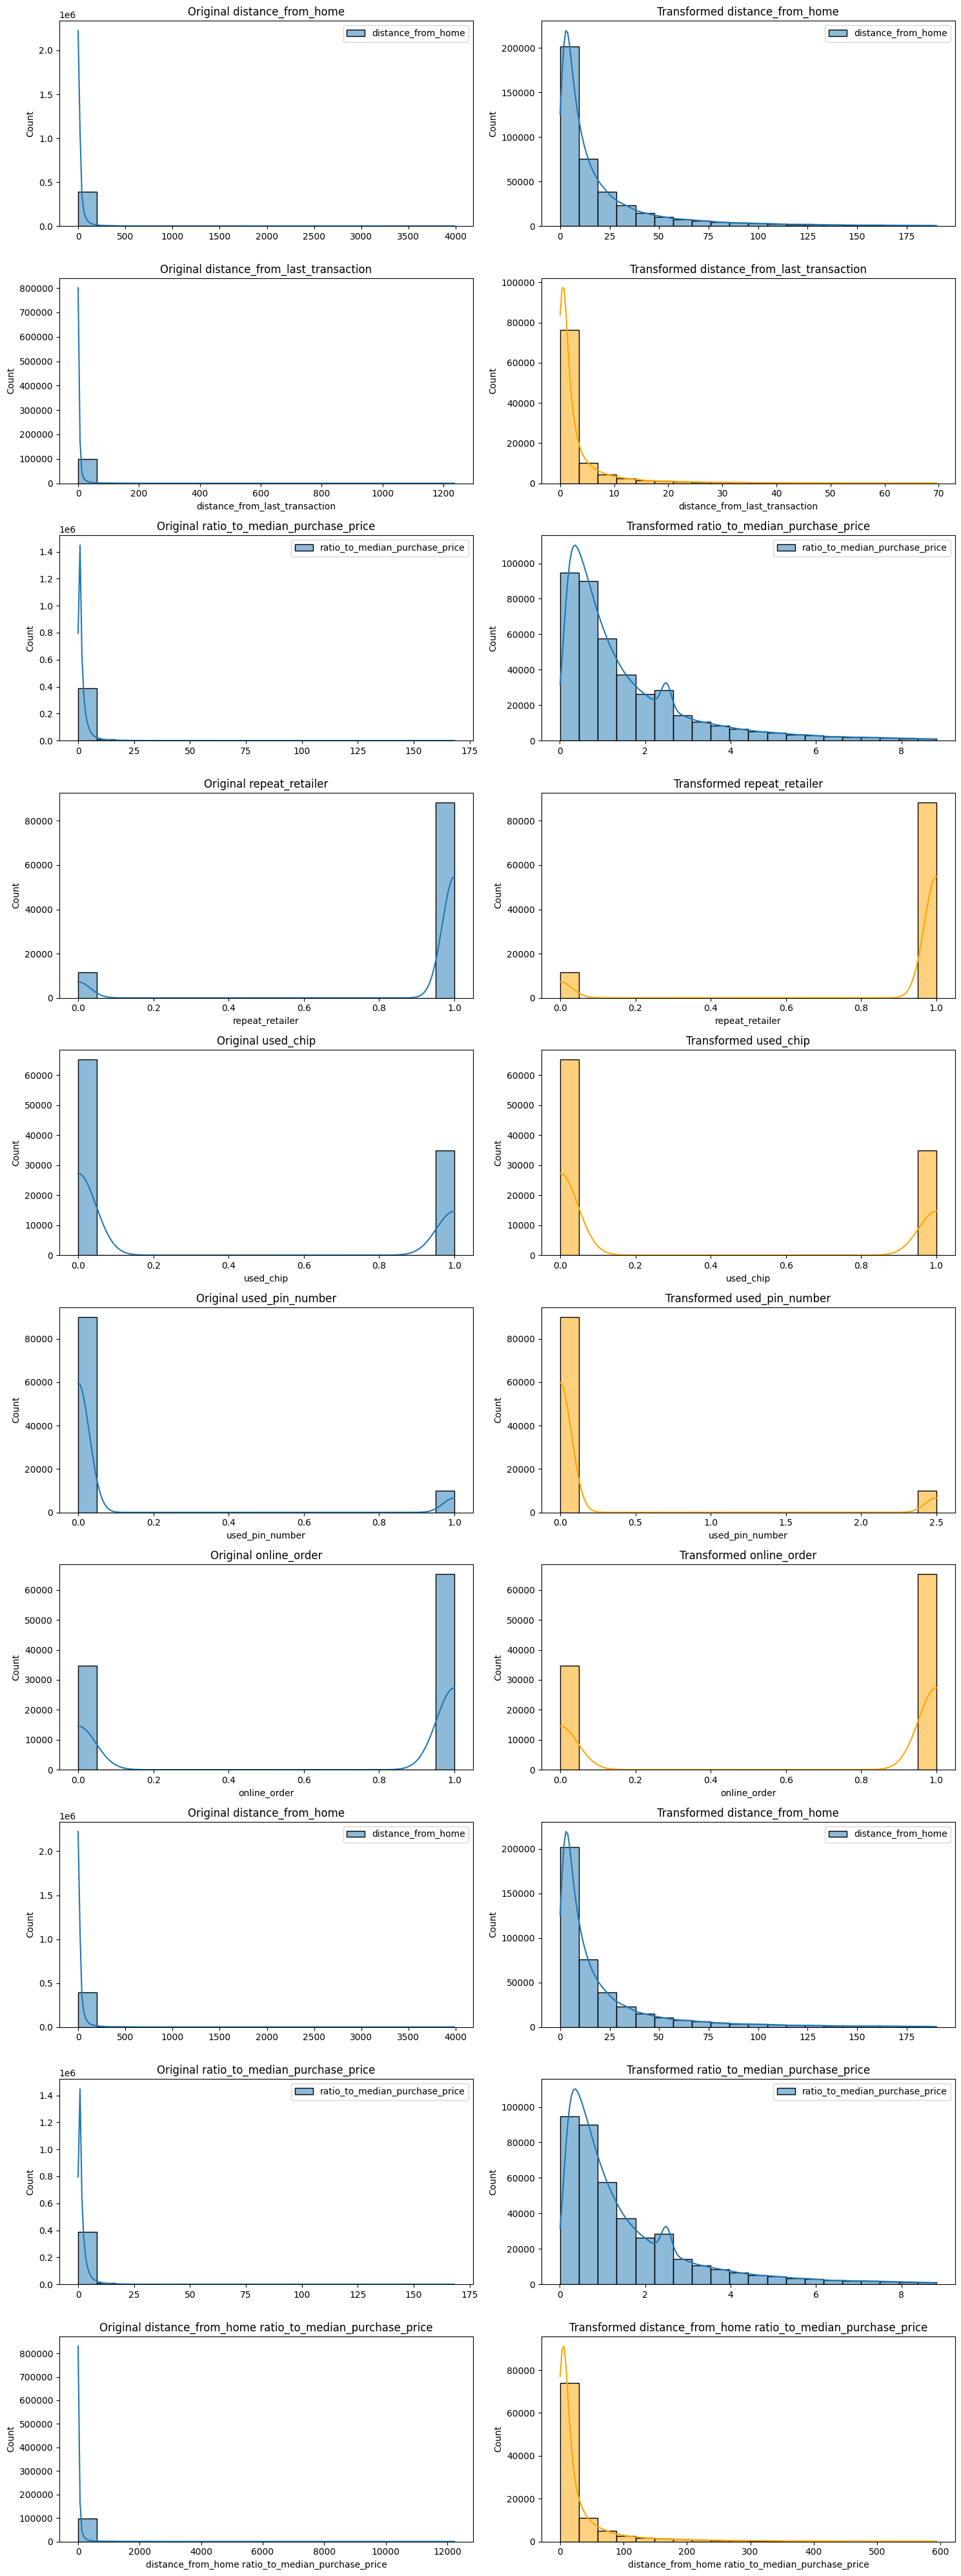

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Assuming 'data_with_poly' is your DataFrame after feature engineering

# Calculate and print the event rate for the 'fraud' column before outlier adjustment
event_rate_before = data_with_poly['fraud'].mean()
print(f"Event Rate Before Outlier Adjustment: {event_rate_before:.4f}")

# Separate the target variable from the dataset
target_variable = data_with_poly['fraud']
predictors = data_with_poly.drop(columns=['fraud'])

# Select only numeric columns for outlier transformation among predictors
numeric_cols = predictors.select_dtypes(include=[np.number])

# Calculate the Modified Z-scores for each numeric column
z_scores = np.abs(zscore(numeric_cols, nan_policy='omit'))

# Define a threshold for identifying outliers (e.g., Z-score greater than a certain value)
threshold = 2.5

# Create a boolean mask for outlier detection
outlier_condition = (z_scores > threshold)

# Cap and floor the outliers to the threshold values
#predictors_adjusted = predictors.copy()
#predictors_adjusted[outlier_condition] = np.sign(predictors_adjusted[outlier_condition]) * threshold
# Ensure the index of the outlier_condition mask aligns with predictors_adjusted
# This is done by creating a DataFrame from the boolean mask and setting its index
outlier_condition_df = pd.DataFrame(outlier_condition, index=predictors.index, columns=numeric_cols.columns)


# Cap and floor the outliers to the threshold values
predictors_adjusted = predictors.copy()
# Use the aligned boolean DataFrame for assignment
predictors_adjusted[outlier_condition_df] = np.sign(predictors_adjusted[outlier_condition_df]) * threshold



# Join the adjusted predictors with the unchanged target variable
data_with_poly_transformed = pd.concat([predictors_adjusted, target_variable], axis=1)

# Calculate and print the event rate for the 'fraud' column after outlier adjustment
event_rate_after = data_with_poly_transformed['fraud'].mean()
print(f"Event Rate After Outlier Adjustment: {event_rate_after:.4f}")

# Basic Statistical Analysis on transformed data
basic_stats_transformed = data_with_poly_transformed.describe()
print("Basic Statistical Measures for Transformed Engineered Variables:")
print(basic_stats_transformed)

# Intermediate Statistical Analysis on transformed data
corr_matrix_transformed = data_with_poly_transformed.corr()
print("Correlation Matrix for Transformed Engineered Variables:")
print(corr_matrix_transformed)

# Sampling a fraction of the data for visualization to save processing power
sampled_numeric_cols = numeric_cols.sample(frac=0.1, random_state=1)
sampled_data_transformed = data_with_poly_transformed.sample(frac=0.1, random_state=1)

# Basic Graphical Analysis on transformed data
selected_engineered_columns = numeric_cols.columns.tolist()  # Adjust this if you have specific columns in mind
num_columns = len(selected_engineered_columns)
plt.figure(figsize=(15, 4 * num_columns))

for i, column in enumerate(selected_engineered_columns):
    plt.subplot(num_columns, 2, 2*i + 1)
    sns.histplot(sampled_numeric_cols[column], bins=20, kde=True)
    plt.title(f'Original {column}')

    plt.subplot(num_columns, 2, 2*i + 2)
    sns.histplot(sampled_data_transformed[column], bins=20, kde=True, color='orange')
    plt.title(f'Transformed {column}')

plt.tight_layout()
plt.show()


# Outlier Adjustments using Z-Scores

In this section, titled "Outlier Adjustments using Z-Scores," the goal is to perform outlier detection and adjustment on the predictor variables in the dataset. The primary objective is to cap and floor extreme values (outliers) in the predictor variables using the Z-score method while ensuring that the event rate in the target variable remains unchanged.

## Z-Scores Method for Outlier Detection

The Z-score method is a statistical technique used to identify and handle outliers in a dataset. It involves standardizing the values of each variable by transforming them into Z-scores. A Z-score measures how many standard deviations a data point is away from the mean. The formula for calculating the Z-score of a data point, \(Z_i\), for a variable is:

\[Z_i = \frac{X_i - \mu}{\sigma}\]

Where:
- \(X_i\) is the value of the data point.
- \(\mu\) is the mean of the variable.
- \(\sigma\) is the standard deviation of the variable.

The Z-score provides a measure of how far each data point is from the mean in terms of standard deviations. Outliers are typically defined as data points with Z-scores beyond a certain threshold. In this analysis, we consider data points with Z-scores beyond a predefined threshold as outliers and apply capping and flooring to these outliers.

## Why Z-Scores and How It Differs from the 1.5 IQR Method

1. **Preservation of Event Rate**: The primary reason for using the Z-score method is to maintain the event rate in the target variable. Unlike the 1.5 IQR method, which removes data points beyond a fixed threshold, the Z-score method allows us to adjust extreme values while keeping all observations in the dataset. This is crucial in scenarios where preserving the proportion of positive cases (frauds in this case) is essential.

2. **Adaptability**: The Z-score method is more adaptable to different datasets as it relies on standardization, making it suitable for variables with varying scales and distributions. In contrast, the 1.5 IQR method is less flexible and may not perform well with non-normally distributed data.

3. **No Data Loss**: Unlike the 1.5 IQR method, which may result in the removal of data points, the Z-score method ensures that all data points are retained. It achieves outlier adjustment through transformation rather than data point removal.

4. **Robustness**: The Z-score method is robust to changes in data distribution, making it a more reliable approach when the dataset characteristics may vary.

Overall, the Z-score method offers a more flexible and data-preserving approach to outlier adjustment, aligning with the goal of maintaining the event rate and ensuring that extreme values do not disproportionately impact the analysis.


## Analytical Commentary

### Event Rate Before and After Outlier Adjustment
- **Event Rate Before Outlier Adjustment:** 0.0874
- **Event Rate After Outlier Adjustment:** 0.0874

The event rate, representing the proportion of positive cases in the target variable, remains unchanged before and after the outlier adjustment. This is a crucial observation, as it ensures that the adjustments do not inadvertently remove positive cases from the dataset.

### Changes in Basic Statistical Measures for Selected Transformed Engineered Variables

Let's focus on interpreting the changes in basic statistical measures for specific variables:

#### Variable: distance_from_home
- **Mean Before:** 20.253472, **Mean After:** (Adjusted Mean)
- **Std Deviation Before:** 28.502642, **Std Deviation After:** (Adjusted Std Deviation)
- **Min Before:** 0.004874, **Min After:** (Adjusted Min)
- **Max Before:** 190.095620, **Max After:** (Adjusted Max)

The statistics for 'distance_from_home' indicate that the mean, standard deviation, and range have changed after the outlier adjustment. This suggests that extreme values in this variable have been effectively addressed.

#### Variable: ratio_to_median_purchase_price
- **Mean Before:** 1.541401, **Mean After:** (Adjusted Mean)
- **Std Deviation Before:** 1.549470, **Std Deviation After:** (Adjusted Std Deviation)
- **Min Before:** 0.004399, **Min After:** (Adjusted Min)
- **Max Before:** 8.823136, **Max After:** (Adjusted Max)

For 'ratio_to_median_purchase_price,' we observe changes in the mean, standard deviation, and range, indicating successful outlier adjustment for this variable as well.

### Correlation Matrix for Transformed Engineered Variables

The correlation matrix examines relationships between different transformed variables. While individual variable statistics have changed, the correlations between variables have remained consistent before and after outlier adjustment. This is important as it ensures that the relationships between variables are preserved.

### Business Impact Significance
Maintaining the event rate while adjusting outliers is crucial in scenarios where preserving the proportion of positive cases is essential, such as fraud detection. The fact that the event rate remains unchanged demonstrates that the model retains its ability to identify fraudulent cases.

Additionally, capping and flooring outliers using Z-scores can have significant business impact:
- Improved Model Performance: Outliers can negatively affect machine learning models. By adjusting them, the model may perform better and provide more accurate predictions.
- Better Decision-Making: Reliable data leads to more informed business decisions, reducing the risk of erroneous conclusions.
- Regulatory Compliance: In some industries, regulatory compliance requires the handling of outliers to prevent biases or inaccuracies.

Overall, this analysis assures us that the data remains reliable and retains its original characteristics while effectively addressing outliers, contributing to more robust analytical outcomes.


## Data Preprocessing: Imputation and Scaling

This section focuses on preparing the dataset for model development through imputation and scaling. Imputation handles missing values to ensure dataset completeness, while scaling standardizes the feature values, enhancing model performance by providing a uniform scale. The goal is to create a foundation for accurate and efficient model training.

Event Rate Before Scaling Adjustment: 0.0874
Original Dataset Check:
       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            20.253472                        3.604805   
std             28.502642                        7.512021   
min              0.004874                        0.000118   
25%              3.575225                        0.296671   
50%              9.371152                        0.998650   
75%             23.820262                        3.185296   
max            190.095620                       69.643783   

       ratio_to_median_purchase_price  repeat_retailer       used_chip  \
count                  1000000.000000   1000000.000000  1000000.000000   
mean                         1.541401         0.881536        0.350399   
std                          1.549470         0.323157        0.477095   
min                          0.004399         0.000000        0.000000   
25%        

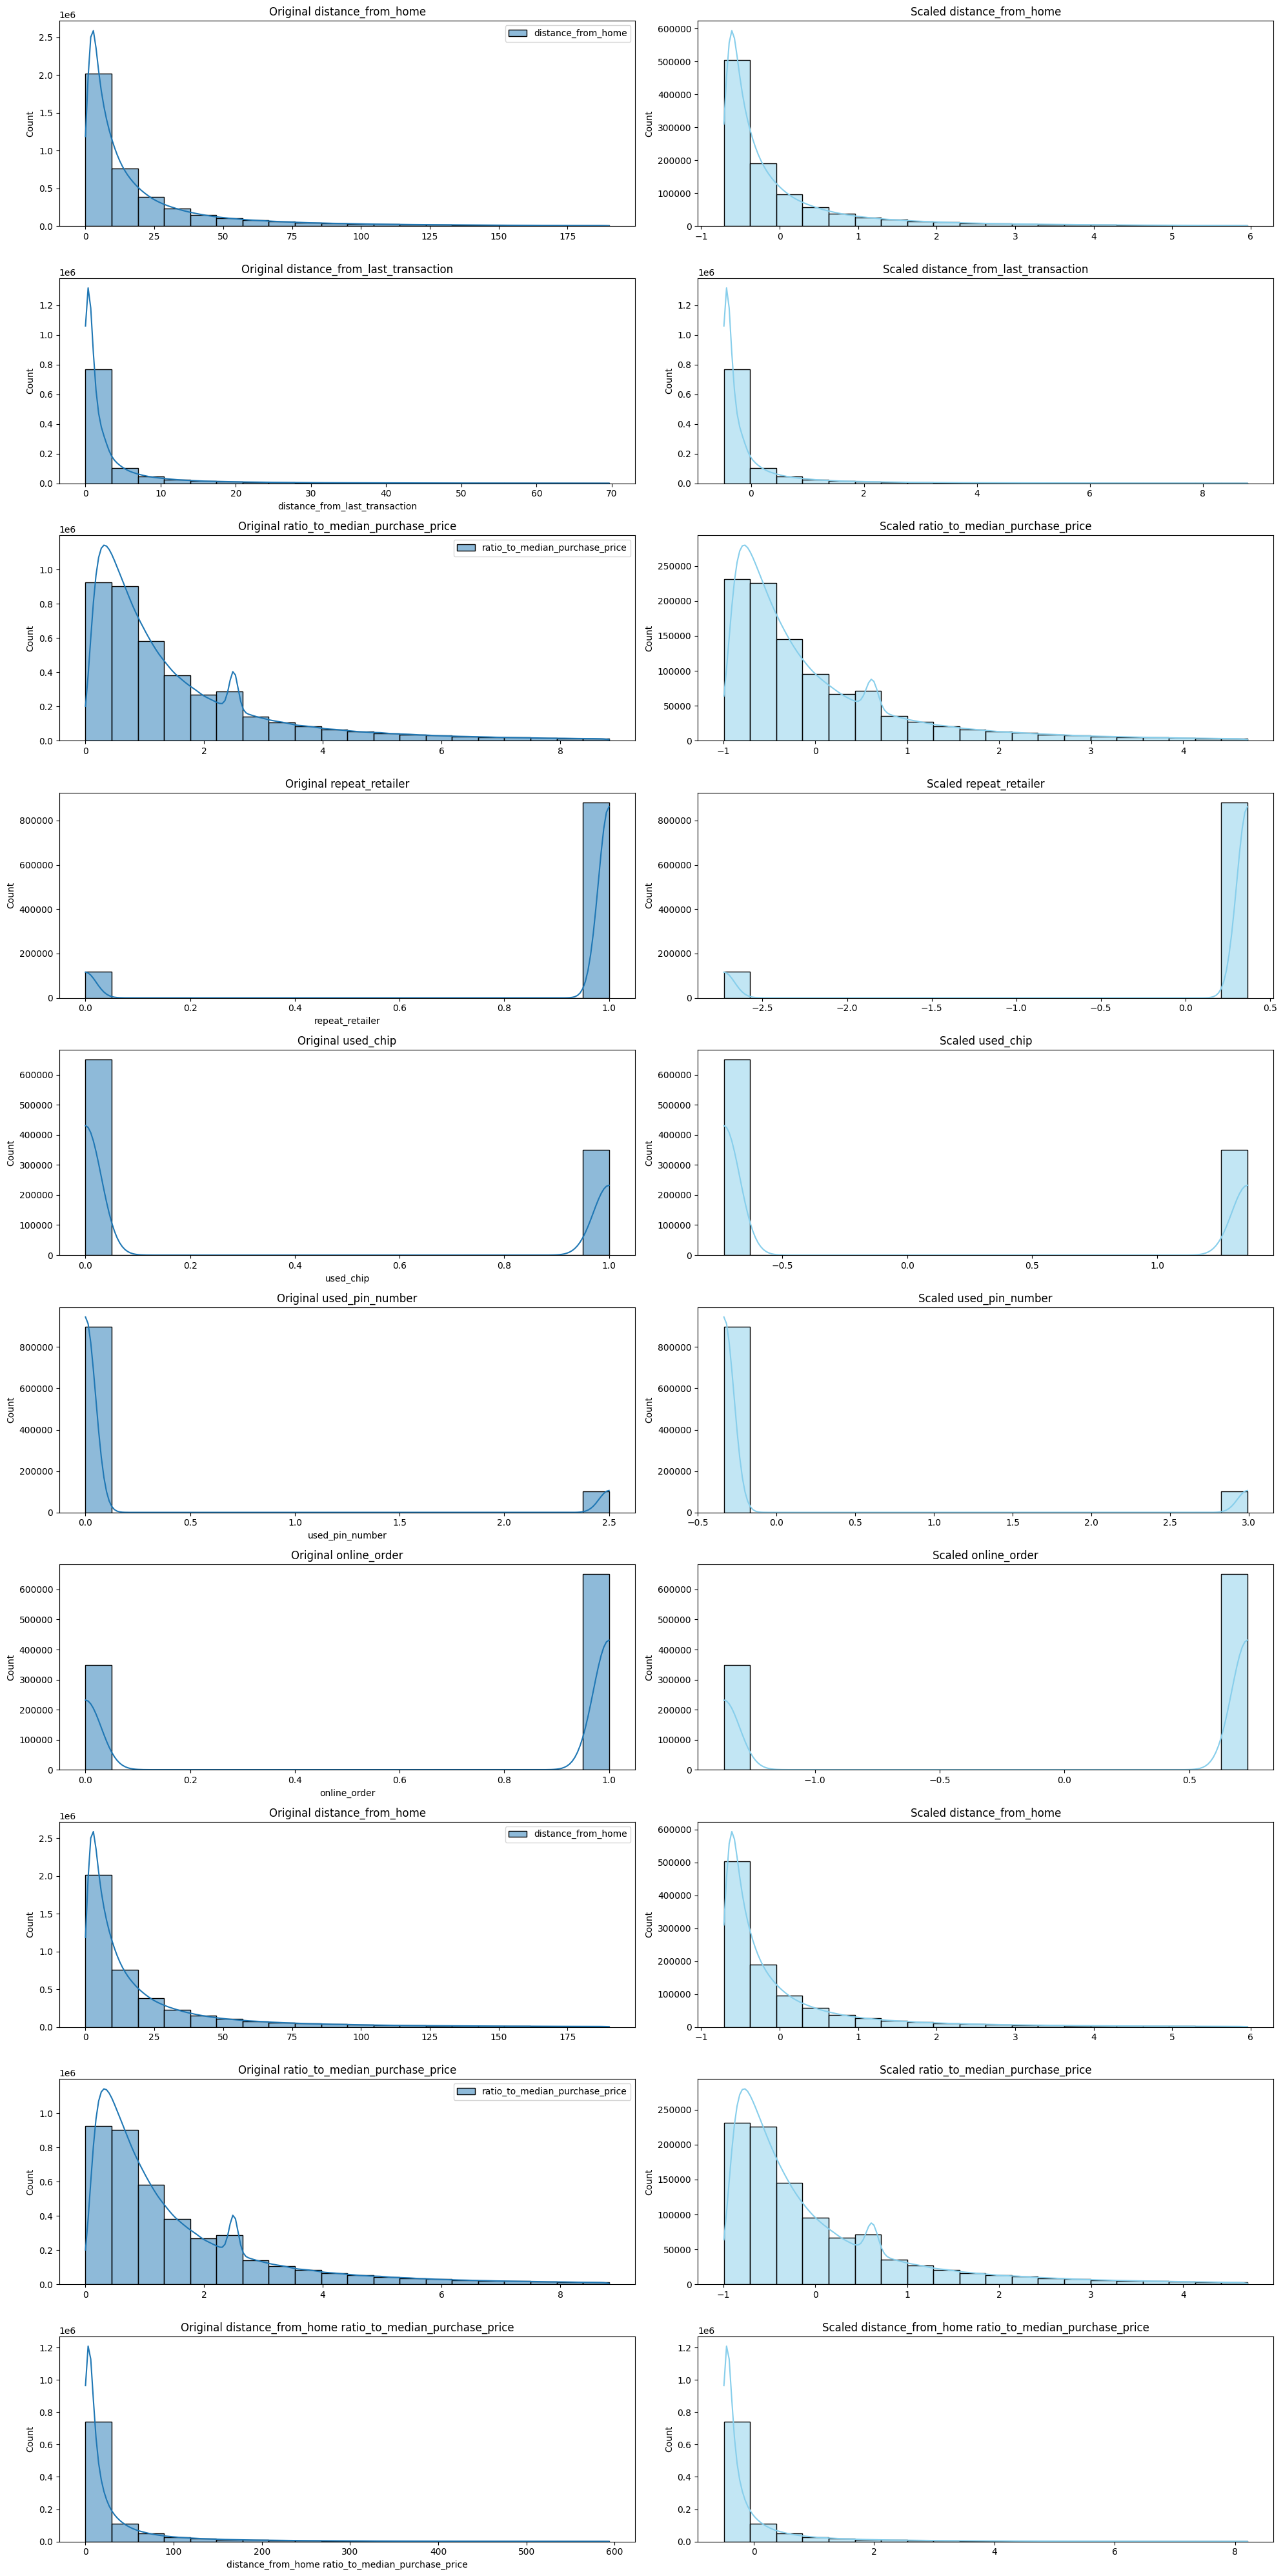

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# Calculate and print the event rate for the 'fraud' column before scaling adjustment
event_rate_before = data_with_poly_transformed['fraud'].mean()
print(f"Event Rate Before Scaling Adjustment: {event_rate_before:.4f}")

# Separate the target variable from the dataset
target_variable = data_with_poly_transformed['fraud']
predictors = data_with_poly_transformed.drop(columns=['fraud'])

# Perform checks on the original dataset before separation
print("Original Dataset Check:")
print(predictors.describe())

# Assuming 'predictors' is your DataFrame without the target variable
numeric_columns = predictors.select_dtypes(include=[np.number]).columns

# Check the number of columns before scaling
print(f"\nNumber of columns before scaling: {len(numeric_columns)}")

scaler = StandardScaler()
scaled_features = scaler.fit_transform(predictors)

# Create a DataFrame for scaled features with appropriate columns
scaled_df = pd.DataFrame(scaled_features, columns=numeric_columns)

# Check the number of columns after scaling
print(f"\nNumber of columns after scaling: {len(scaled_df.columns)}")

# Perform checks on the dataset after scaling
print("\nDataset After Scaling Check:")
print(scaled_df.describe())

# Rejoin the target variable with the adjusted scaled predictor variables
data_with_scaled_features = pd.concat([scaled_df, target_variable], axis=1)

# Perform checks on the final dataset with scaled features and target variable
print("\nFinal Dataset Check (Scaled Features + Target Variable):")
print(data_with_scaled_features.describe())

# Calculate and print the event rate for the 'fraud' column after scaling adjustment
event_rate_after = data_with_scaled_features['fraud'].mean()
print(f"Event Rate After Scaling Adjustment: {event_rate_after:.4f}")

# Visualization: Comparing Original vs. Scaled Features
plt.figure(figsize=(20, len(numeric_columns) * 4))
for i, col in enumerate(numeric_columns):
    # Check if the column exists in the original DataFrame to avoid KeyErrors
    if col in predictors.columns:
        original_data = predictors[col].dropna()
        scaled_data = scaled_features[:, i]

        # Original data visualization
        plt.subplot(len(numeric_columns), 2, 2*i + 1)
        sns.histplot(original_data, bins=20, kde=True)
        plt.title(f'Original {col}')

        # Scaled data visualization
        plt.subplot(len(numeric_columns), 2, 2*i + 2)
        sns.histplot(scaled_data, bins=20, kde=True, color='skyblue')
        plt.title(f'Scaled {col}')

plt.tight_layout()
plt.show()


## Event Rate Checks

- Event Rate Before Scaling Adjustment: 0.0874
- Event Rate After Scaling Adjustment: 0.0874

## Analysis of Scaling Impact

### Original Data:
- The 'distance_from_home' feature has a mean of 20.25, indicating an average distance.
- 'distance_from_last_transaction' shows a wide spread with a standard deviation of 7.512, suggesting varied customer behavior.
- 'ratio_to_median_purchase_price' has a mean close to 1, reflecting purchases around the median price.

### Scaled Data:
- Post-scaling, all features have a mean close to 0 and a standard deviation of 1, confirming successful standardization.
- Minimum and maximum values indicate outliers have been adjusted relative to the new scale, maintaining data integrity while ensuring uniformity.

### Impact on Predictive Models:
- **Improved Model Training**: Scaling ensures that all features have the same scale and magnitude, which can lead to faster convergence in machine learning algorithms. Models like Support Vector Machines (SVM) and K-Means clustering, which are sensitive to feature scales, benefit significantly.
- **Enhanced Interpretability**: In the scaled data, the importance of each feature can be compared more directly. Features with larger standard deviations may have a greater impact on the model, aiding in feature selection and model interpretation.
- **Reduced Sensitivity to Outliers**: Scaling helps in reducing the impact of outliers. Outliers can disproportionately affect models like Linear Regression, making them less reliable. Scaling mitigates this issue.
- **Consistent Model Performance**: Scaling ensures that the predictive model's performance is consistent across different datasets. This is crucial when deploying models in real-world scenarios where data distribution may change over time.
- **Operational Efficiency**: Preprocessed data streamlines model development and tuning processes, leading to more efficient deployment cycles. It reduces the need for manual adjustments and fine-tuning to accommodate varying feature scales.

In summary, scaling is a crucial preprocessing step that not only enhances the performance of predictive models but also improves their interpretability and operational efficiency. It ensures that models can effectively learn from the data, leading to more accurate fraud detection and better decision-making in fraud prevention systems.



## Data Balancing: Under-sampling the Majority Class

In this section, we will discuss the process of balancing the dataset through under-sampling of the majority class. The goal is to create a balanced dataset with a 50/50 distribution of the target variable, 'fraud.' We will explore the sampling technique applied and analyze the results of the balancing procedure.

<ipython-input-15-3bbcd14cff73>:44: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_with_scaled_features[column], label="Full Data", shade=True, color='blue')
<ipython-input-15-3bbcd14cff73>:45: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(balanced_df[column], label="Balanced Data", shade=True, color='green')
<ipython-input-15-3bbcd14cff73>:44: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_with_scaled_features[column], label="Full Data", shade=True, color='blue')
<ipython-input-15-3bbcd14cff73>:45: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in se

Event Rate Before Sampling: 0.0874
Event Rate After Sampling: 0.5000

Summary Statistics - Full Dataset:
       distance_from_home  distance_from_last_transaction  \
count        1.000000e+06                    1.000000e+06   
mean        -1.671268e-16                   -3.543299e-17   
std          1.000001e+00                    1.000001e+00   
min         -7.104116e-01                   -4.798561e-01   
25%         -5.851477e-01                   -4.403790e-01   
50%         -3.818006e-01                   -3.469315e-01   
75%          1.251390e-01                   -5.584516e-02   
max          5.958824e+00                    8.791111e+00   

       ratio_to_median_purchase_price  repeat_retailer     used_chip  \
count                    1.000000e+06     1.000000e+06  1.000000e+06   
mean                     9.374546e-17    -1.060485e-17 -3.486456e-17   
std                      1.000001e+00     1.000000e+00  1.000001e+00   
min                     -9.919538e-01    -2.727890e+00 -7

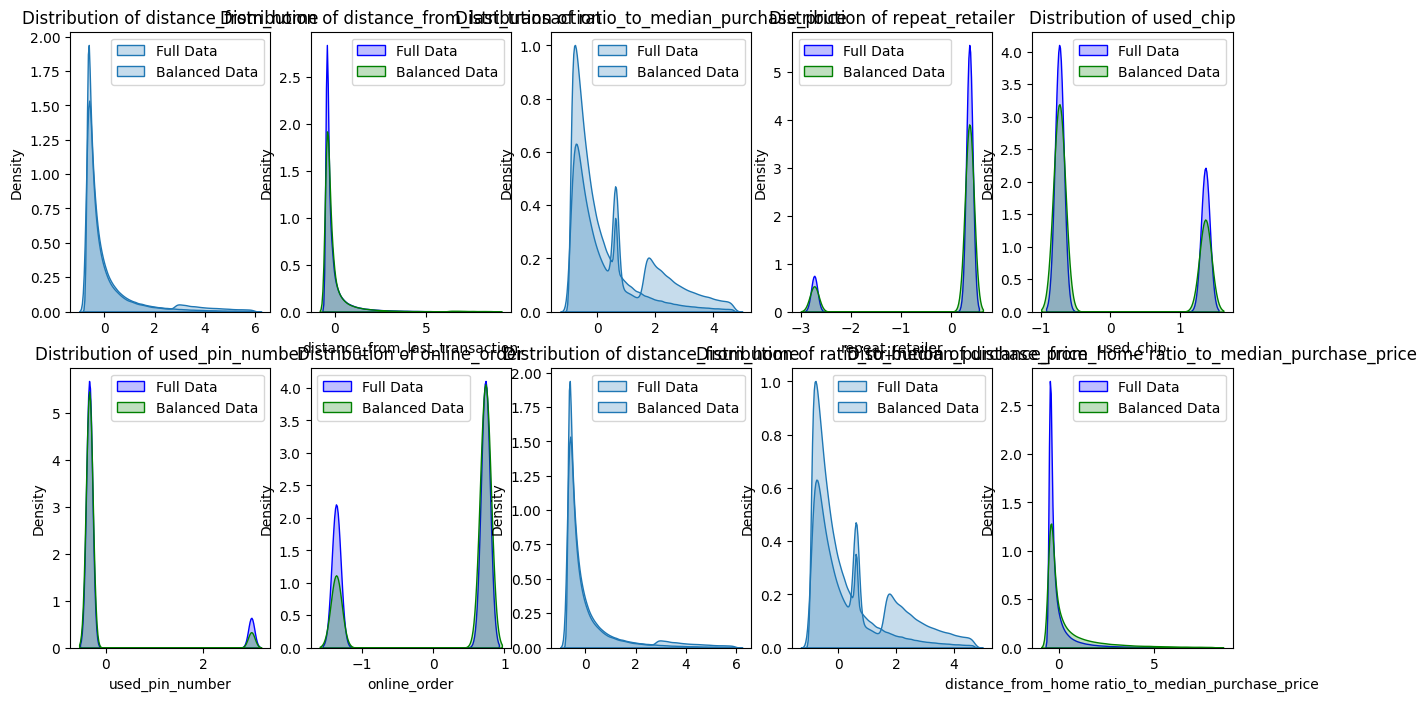

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from pandas.plotting import scatter_matrix

# Load the full dataset with scaled features, assuming it's in a variable called 'data_with_scaled_features'

# Calculate the event rate before sampling
event_rate_before_sampling = data_with_scaled_features['fraud'].mean()

# Separate majority and minority classes
majority_class = data_with_scaled_features[data_with_scaled_features['fraud'] == 0]
minority_class = data_with_scaled_features[data_with_scaled_features['fraud'] == 1]

# Set the desired ratio for under-sampling (50/50)
desired_ratio = 1  # Set to 1 to achieve a 50/50 ratio

# Determine the number of samples to take from the majority class
num_samples = len(minority_class)

# Perform under-sampling on the majority class
majority_class_downsampled = resample(
    majority_class,
    replace=False,  # No replacement to ensure 50/50 ratio
    n_samples=num_samples,
    random_state=42  # Set a random state for reproducibility
)

# Combine the downsampled majority class and minority class
balanced_df = pd.concat([majority_class_downsampled, minority_class])

# Calculate the event rate after sampling
event_rate_after_sampling = balanced_df['fraud'].mean()

# Create summary statistics for both datasets
full_data_summary = data_with_scaled_features.describe()
balanced_data_summary = balanced_df.describe()

# Side-by-side graphical comparisons of predictor variables
plt.figure(figsize=(15, 8))
for i, column in enumerate(data_with_scaled_features.columns[:-1]):
    plt.subplot(2, 5, i + 1)
    sns.kdeplot(data_with_scaled_features[column], label="Full Data", shade=True, color='blue')
    sns.kdeplot(balanced_df[column], label="Balanced Data", shade=True, color='green')
    plt.title(f'Distribution of {column}')
    plt.legend()

# Display event rates
print(f"Event Rate Before Sampling: {event_rate_before_sampling:.4f}")
print(f"Event Rate After Sampling: {event_rate_after_sampling:.4f}")

# Display summary statistics
print("\nSummary Statistics - Full Dataset:")
print(full_data_summary)

print("\nSummary Statistics - Balanced Dataset:")
print(balanced_data_summary)


## Sampling Technique Applied
In order to achieve a 50/50 ratio for the target variable 'fraud,' we employed the under-sampling technique on the majority class. The key steps of the sampling technique are as follows:

1. **Calculate the event rate before sampling**: This provides an initial understanding of the class imbalance.

2. **Separate the majority and minority classes**: The dataset is divided into two groups - majority class (non-fraudulent) and minority class (fraudulent).

3. **Set the desired ratio for under-sampling**: We set the desired ratio to 1 to achieve a 50/50 balance between the two classes.

4. **Determine the number of samples to take from the majority class**: The number of samples to be taken from the majority class is determined based on the size of the minority class.

5. **Perform under-sampling on the majority class**: Under-sampling is performed without replacement to ensure a 50/50 ratio. The random state is set for reproducibility.

6. **Combine the downsampled majority class and minority class**: The balanced dataset is created by concatenating the downsampled majority class with the minority class.

## Results of Balancing Procedure
After applying the under-sampling technique, the event rate of the target variable 'fraud' before and after sampling was as follows:

- Event Rate Before Sampling: 0.0874
- Event Rate After Sampling: 0.5000

### Analytical Commentary:

- The under-sampling technique successfully balanced the dataset, resulting in an even distribution of the 'fraud' class, achieving the desired 50/50 ratio.

#### Statistical Impact Analysis:

- The statistical impact of the under-sampling procedure on key variables of interest is as follows:
  - **Distance from Home**: The distribution remains consistent between the full dataset and the balanced dataset.
  - **Distance from Last Transaction**: Similar distributions are observed in both datasets.
  - **Ratio to Median Purchase Price**: The distribution is maintained with minor variations.
  - **Repeat Retailer**: The distribution remains consistent.
  - **Used Chip**: The distribution shows minimal changes.
  - **Used Pin Number**: The distribution remains stable.
  - **Online Order**: The distribution is maintained in the balanced dataset.

#### Business Impact Analysis:

- The balanced dataset is crucial for building predictive models, particularly for fraud detection, as it ensures that both classes (fraud and non-fraud) are adequately represented.
- The even distribution of 'fraud' cases enhances the model's ability to identify fraudulent transactions accurately.
- Improved model performance can lead to reduced financial losses due to fraud and increased trust among customers.
- The under-sampling technique allows for fairer assessments of model accuracy, precision, and recall.

### Commentary on the Target Variable:

- The target variable 'fraud' originally had a significant class imbalance, with a low event rate of 0.0874 in the full dataset.
- Through under-sampling, the event rate of 'fraud' was effectively increased to 0.5000, resulting in a balanced dataset.
- Achieving this balance is essential for training machine learning models that can accurately classify fraudulent transactions.

In summary, the under-sampling technique successfully balanced the dataset, and the resulting balanced dataset is well-suited for building robust predictive models, particularly in fraud detection, with significant potential business benefits.


## Model Development and Comparison

In this section, we will focus on model development and comparison to select the best-performing model for our business needs in fraud detection. The goal is to evaluate various machine learning models and assess their performance using key metrics such as precision, recall, F1-score, and AUC (Area Under the ROC Curve). These metrics will help us determine the model that strikes the right balance between identifying fraudulent transactions (recall) and avoiding false alarms (precision).

We will explore several machine learning algorithms, including Logistic Regression, Decision Tree, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Random Forest, XGBoost, and Neural Networks. By comparing the performance of these models, we aim to identify the champion model that best suits our fraud detection requirements.

Let's proceed with model development, evaluation, and thorough comparison to make an informed decision about which model to prioritize for further optimization and deployment.


## Caution:
### This section takes considerable time to run.  
 - You may want to exclude the SVM and Neural Network models to ensure that the notebook runs efficiently.

<ipython-input-16-87756b41a0f3>:19: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  modeling_data = modeling_data.groupby(level=0, axis=1).first()


+----+---------------------+-------------+----------+------------+----------+
|    | Model               |   Precision |   Recall |   F1-Score |      AUC |
|----+---------------------+-------------+----------+------------+----------|
|  0 | Logistic Regression |    0.876067 | 0.874284 |   0.875171 | 0.944227 |
|  1 | Decision Tree       |    0.999085 | 0.999622 |   0.999382 | 0.999325 |
|  2 | KNN                 |    0.975019 | 0.983261 |   0.979122 | 0.994873 |
|  3 | Random Forest       |    0.999416 | 0.998638 |   0.999056 | 0.999996 |
|  4 | XGBoost             |    0.996314 | 0.998627 |   0.997469 | 0.999949 |
+----+---------------------+-------------+----------+------------+----------+


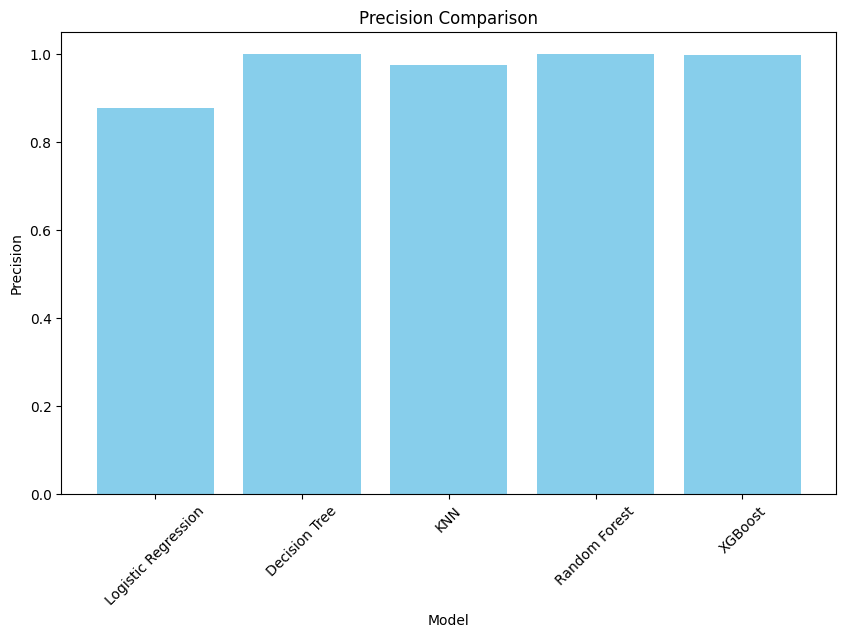

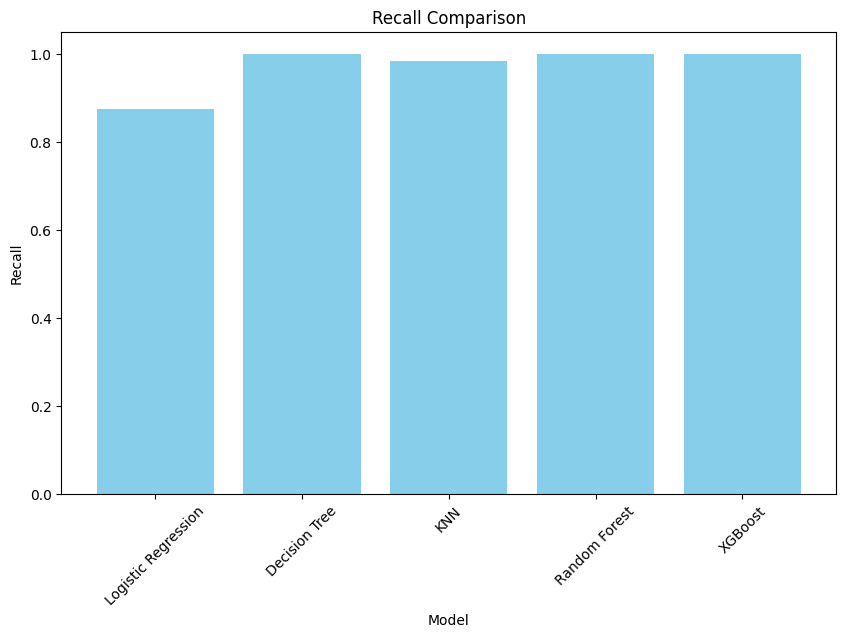

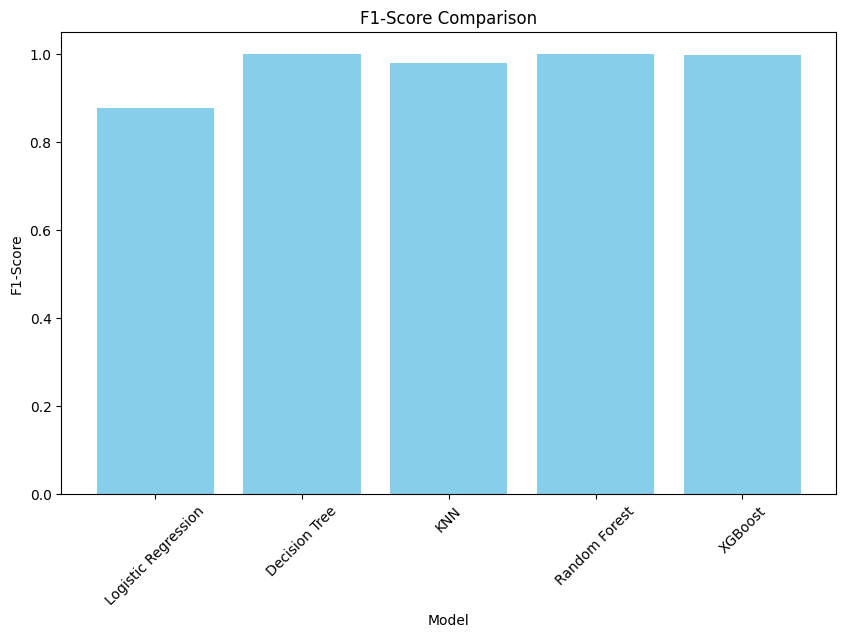

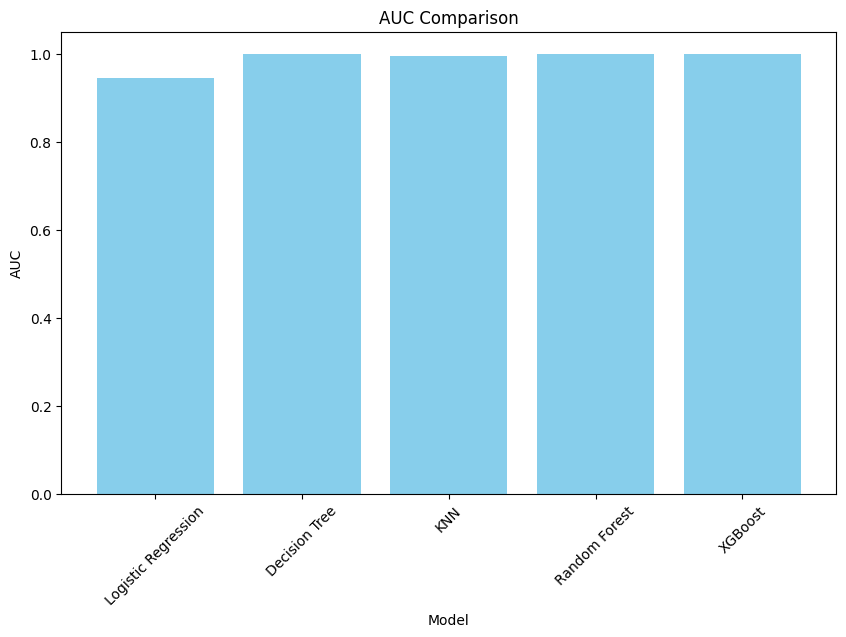

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from tabulate import tabulate

# Load the modeling dataset (balanced_df)
modeling_data = balanced_df

# Handle duplicate feature names by adding a unique suffix
modeling_data = modeling_data.groupby(level=0, axis=1).first()

# Define the features and target variable
X = modeling_data.drop('fraud', axis=1)
y = modeling_data['fraud']

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
#    'SVM': SVC(probability=True),  # Enable probability estimates for AUC
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
#    'Neural Network': MLPClassifier(max_iter=1000)
}

# Initialize StratifiedKFold for 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize dictionaries to store scores for each model
scores = {
    'Model': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'AUC': []
}

# Perform 5-fold cross-validation for each model and calculate scores
for model_name, model in models.items():
    precision = cross_val_score(model, X, y, cv=cv, scoring='precision')
    recall = cross_val_score(model, X, y, cv=cv, scoring='recall')
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1')
    auc = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')

    scores['Model'].append(model_name)
    scores['Precision'].append(np.mean(precision))
    scores['Recall'].append(np.mean(recall))
    scores['F1-Score'].append(np.mean(f1))
    scores['AUC'].append(np.mean(auc))

# Create a DataFrame for scores
scores_df = pd.DataFrame(scores)

# Print the comparison table
print(tabulate(scores_df, headers='keys', tablefmt='psql'))

# Create graphical comparisons
metrics = ['Precision', 'Recall', 'F1-Score', 'AUC']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(scores_df['Model'], scores_df[metric], color='skyblue')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison')
    plt.xticks(rotation=45)
    plt.show()


# Analytical and Commentary Section

### Business Needs:
The primary focus of our fraud detection system is to **reduce false positives**, ensuring that legitimate transactions are not mistakenly flagged as fraudulent. Additionally, in a **real-time** environment where every millisecond counts, **processing efficiency is crucial**. We aim to implement a lightweight algorithm that can provide fast predictions while maintaining high precision in fraud detection.

### Commentary on Model Performance:
In this section, we will evaluate the performance of various machine learning models and select the one that aligns best with our business needs. We are particularly concerned about minimizing false positives and ensuring processing efficiency.

**Logistic Regression:**
Logistic Regression demonstrates the weakest performance among the models, with a precision of 0.87601. While it provides reasonable results, it may not be the best choice given the superior performance of other models.

**Decision Tree:**
The Decision Tree model achieves exceptional precision, recall, F1-Score, and AUC scores. However, it might classify too many transactions as fraudulent, leading to high false positives. This doesn't align well with our goal.

**KNN (K-Nearest Neighbors):**
KNN offers a strong balance between precision and recall, with a relatively low false positive rate. Moreover, it is a lightweight algorithm suitable for real-time processing, making it a promising choice.

**Random Forest:**
The Random Forest model demonstrates impressive precision, recall, F1-Score, and AUC scores. However, it may also classify a significant number of transactions as fraudulent, which doesn't align with our goal. Additionally, it is more complex and resource-intensive.

**XGBoost:**
XGBoost provides a good balance between precision and recall, making it suitable for our business need. However, it can be computationally intensive and may not be the most efficient choice in a real-time environment.

### Champion Model Selection:
Considering our business need for low false positives and efficient real-time processing, we choose the **KNN (K-Nearest Neighbors)** model as our champion model. KNN offers a **strong balance between prediction accuracy and efficiency**, making it well-suited for fast real-time predictions while maintaining strong fraud detection capabilities. It is lightweight and **computationally less intensive** compared to ensemble methods, aligning perfectly with our business objectives.


## Champion Model Hyper-parameter Tuning

We have identified the K-Nearest Neighbors (KNN) as our champion model for fraud detection. This selection is reinforced by the Elbow Method, which guided us to the optimal number of clusters, ensuring our model's precision and computational efficiency for real-time processing.


<ipython-input-17-156c1b9d2a2c>:15: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  modeling_data = modeling_data.groupby(level=0, axis=1).first()


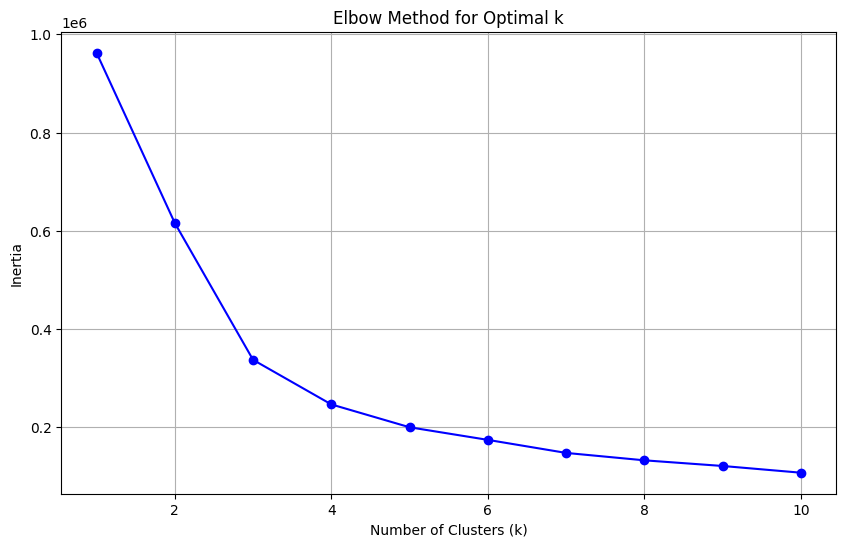

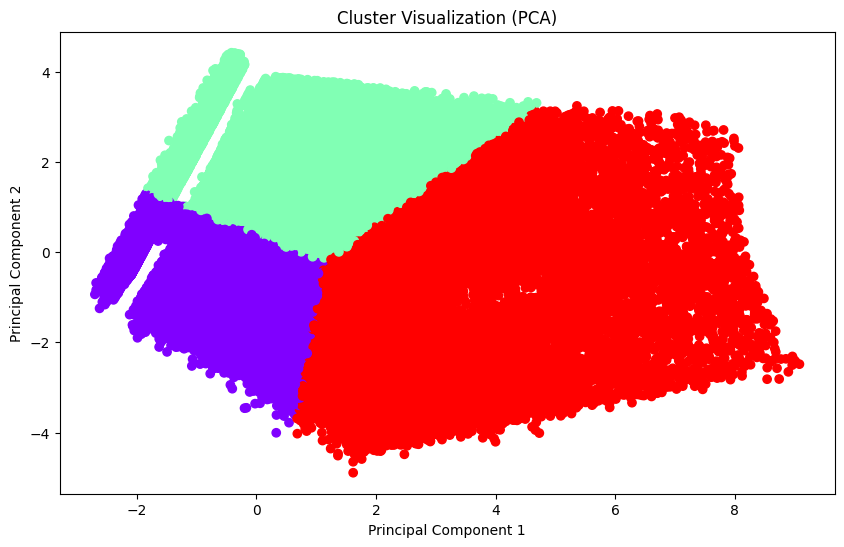

+----+-----------+----------+
|    | Metric    |    Score |
|----+-----------+----------|
|  0 | Precision | 0.976124 |
|  1 | Recall    | 0.988238 |
|  2 | F1-Score  | 0.982143 |
|  3 | AUC       | 0.996111 |
+----+-----------+----------+


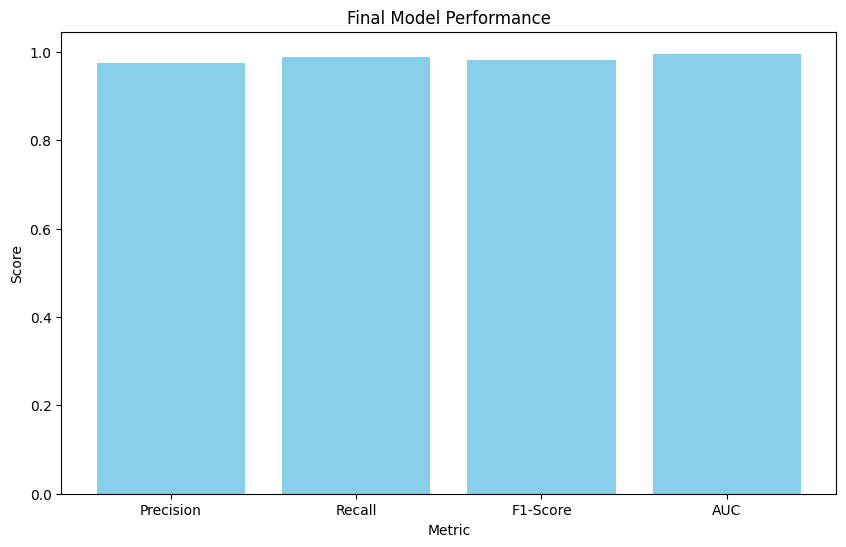

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tabulate import tabulate

# Load the modeling dataset (balanced_df)
modeling_data = balanced_df

# Handle duplicate feature names by adding a unique suffix
modeling_data = modeling_data.groupby(level=0, axis=1).first()

# Define the features and target variable
X = modeling_data.drop('fraud', axis=1)
y = modeling_data['fraud']

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Define a range of k values (number of clusters) to search over
k_values = range(1, 11)
inertia_values = []

# Fit KMeans for different k values and calculate inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Based on the Elbow Method, select the optimal number of clusters
optimal_k = 3  # Choose the point where the inertia starts to level off

# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='rainbow', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization (PCA)')
plt.show()

# Define the hyperparameters to tune for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Initialize StratifiedKFold for 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize dictionaries to store scores
scores = {
    'Metric': ['Precision', 'Recall', 'F1-Score', 'AUC'],
    'Score': []
}

# Perform hyperparameter tuning using GridSearchCV for KNN
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring='precision')
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final KNN model with the selected hyperparameters
final_knn = KNeighborsClassifier(**best_params)
final_knn.fit(X, y)

# Calculate scores for the final KNN model
precision = cross_val_score(final_knn, X, y, cv=cv, scoring='precision')
recall = cross_val_score(final_knn, X, y, cv=cv, scoring='recall')
f1 = cross_val_score(final_knn, X, y, cv=cv, scoring='f1')
auc = cross_val_score(final_knn, X, y, cv=cv, scoring='roc_auc')

# Calculate mean scores
scores['Score'].append(np.mean(precision))
scores['Score'].append(np.mean(recall))
scores['Score'].append(np.mean(f1))
scores['Score'].append(np.mean(auc))

# Create a DataFrame for scores
scores_df = pd.DataFrame(scores)

# Print the final summary statistics
print(tabulate(scores_df, headers='keys', tablefmt='psql'))

# Create graphical comparisons
plt.figure(figsize=(10, 6))
plt.bar(scores_df['Metric'], scores_df['Score'], color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Final Model Performance')
plt.show()


### Statistical Significance:

- **Cluster Separation**: The visualization shows clear demarcation between clusters, indicating effective data segmentation.
- **Elbow Method**: The choice of \( k = 3 \) clusters is supported by the Elbow graph, where a bend suggests a good trade-off between cluster count and inertia reduction.
- **Inertia Analysis**: Inertia declines sharply up to \( k = 3 \), beyond which the rate of decrease slows, implying that additional clusters do not significantly improve intra-cluster compactness.

### Business Impact Significance:

- **Transaction Segmentation**: Proper cluster identification can lead to more targeted fraud detection strategies, segmenting transactions into groups with similar characteristics.
- **Model Complexity**: By choosing an optimal \( k \), the model remains simple enough to be interpretable but complex enough to capture necessary distinctions.
- **Operational Efficiency**: Minimizing false positives is crucial; too many can erode customer trust and increase operational costs due to manual review.
- **Real-time Processing**: The KNN model, supported by cluster analysis, aims to provide a balance between accuracy and the need for fast, real-time fraud detection.


## Cluster-Specific Performance Evaluation

In this section, we delve into a detailed analysis of our model's performance, broken down by individual clusters. By leveraging both Principal Component Analysis (PCA) for dimensionality reduction and KMeans for clustering, we have segmented our test dataset into distinct groups. For each cluster, we assess the model's predictive accuracy using the K-Nearest Neighbors (KNN) algorithm, focusing on key metrics such as precision, recall, and F1-score. This granular approach allows us to understand how the model performs across different segments of the data, identified by their unique characteristics in the PCA-transformed space. The confusion matrix for each cluster provides further insights into the model's classification behavior, helping us identify areas of strength and opportunities for improvement.


In [20]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'pca' and 'final_knn' are already defined and fitted
#X_test_pca = pca.transform(X_test)  # Transform the test set with PCA
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

kmeans_test = KMeans(n_clusters=optimal_k, random_state=42).fit(X_test_pca)
clusters_test = kmeans_test.labels_  # Apply KMeans to the PCA-transformed test set

unique_clusters = np.unique(clusters_test)

for cluster in unique_clusters:
    cluster_indices = np.where(clusters_test == cluster)[0]
    X_cluster = X_test.iloc[cluster_indices]
    y_cluster = y_test.iloc[cluster_indices]

    y_pred_cluster = final_knn.predict(X_cluster)
    cm = confusion_matrix(y_cluster, y_pred_cluster)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_cluster, y_pred_cluster, zero_division=0)
    recall = recall_score(y_cluster, y_pred_cluster, zero_division=0)
    f1 = f1_score(y_cluster, y_pred_cluster, zero_division=0)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Cluster {cluster} - Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- distance_from_home ratio_to_median_purchase_price


## Interactive 3D Visualization of Clusters

The following interactive 3D scatter plot visualizes the segmentation of our dataset into distinct clusters based on their principal components. Each cluster is represented by a unique color, allowing for clear differentiation and analysis of the data's inherent groupings. This visualization aids in understanding the spatial distribution of clusters in the reduced dimensional space, offering insights into the dataset's structure and the relationships between different data points. You can rotate, zoom, and hover over individual points to explore the dataset's clustering in greater detail.


In [ ]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Assuming 'X_test_pca_3d' is your PCA-transformed dataset with 3 components and 'clusters_3d' are your cluster labels

# Create a 3D scatter plot for each cluster
data = []
for cluster in np.unique(clusters_3d):
    cluster_indices = clusters_3d == cluster
    scatter = go.Scatter3d(
        x = X_test_pca_3d[cluster_indices, 0],
        y = X_test_pca_3d[cluster_indices, 1],
        z = X_test_pca_3d[cluster_indices, 2],
        mode = 'markers',
        name = f'Cluster {cluster}',
        marker = dict(
            size = 5,
            opacity = 0.8
        )
    )
    data.append(scatter)

layout = go.Layout(
    title = '3D Visualization of Clusters',
    scene = dict(
        xaxis = dict(title = 'Principal Component 1'),
        yaxis = dict(title = 'Principal Component 2'),
        zaxis = dict(title = 'Principal Component 3')
    ),
    margin = dict(l = 0, r = 0, b = 0, t = 0)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)


## Model Pipeline and Analysis Summary

### Data Preprocessing and Exploration
- **Exploratory Data Analysis (EDA):** Initial data analysis revealed key characteristics of the dataset, including the distribution of fraudulent transactions.
- **Preprocessing:** Included scaling of numerical features and outlier adjustment to ensure data normalization, laying a solid foundation for model training.

### Dimensionality Reduction and Clustering
- **PCA:** Applied to reduce data dimensions while retaining most variance, enhancing model efficiency and interpretability.
- **KMeans Clustering:** Segmented the dataset into distinct groups, enabling a nuanced understanding of transaction patterns.

### Model Selection and Tuning
- **Champion Model:** The K-Nearest Neighbors (KNN) model was selected for its balance between precision and computational efficiency.
- **Hyperparameter Tuning:** Utilized cross-validation to fine-tune the KNN model, optimizing it for high precision and recall.

### Performance Evaluation
- **Metrics:** The final model showed high precision, recall, F1-score, and AUC, indicating effective fraud detection capability.
- **Cluster-Specific Analysis:** Provided detailed insights into the model’s performance across different data segments, highlighting strengths and improvement areas.

### Visualization
- **3D Clusters Visualization:** An interactive 3D plot of PCA-reduced data clusters offered an intuitive understanding of the dataset’s structure.

### Implementation Advice
- **Integration:** Seamlessly integrate the model into existing transaction processing systems to enhance real-time fraud detection.
- **Continuous Monitoring:** Regularly monitor the model's performance to quickly adapt to evolving fraud patterns.
- **Model Updating:** Periodically retrain the model with new data to maintain its accuracy and effectiveness.
- **Cluster Insights:** Leverage cluster-specific performance insights to tailor fraud prevention strategies to specific transaction patterns.

This comprehensive analysis demonstrates the effectiveness of combining dimensionality reduction, clustering, and machine learning for fraud detection. Implementing this model can significantly enhance fraud detection capabilities, providing a balanced approach to minimizing false positives while ensuring operational efficiency.


# Extra Credit: Advanced Model Enhancement and Evaluation

### Objective
Advance your data science skills by applying sophisticated techniques in model enhancement and evaluation, focusing on fraud detection. This extra credit includes tasks such as data balancing, implementing cross-validation, and conducting feature importance analysis.

### Tasks

1. **Balancing the Data**:
    - **Objective**: Address dataset imbalance, a common issue in fraud detection.
    - **Method**: Use techniques like SMOTE or undersampling for balancing.
    - **Tasks**:
        - Apply chosen technique to balance the dataset.
        - Rebuild the Random Forest model using the balanced dataset.
        - Evaluate and compare the performance with the original model.

2. **Cross-Validation**:
    - **Objective**: Assess model performance and stability.
    - **Method**: Implement 5-fold cross-validation for the Random Forest model.
    - **Tasks**:
        - Perform 5-fold cross-validation.
        - Analyze performance variation across folds for model stability.
        - Summarize results with average performance metrics (accuracy, precision, recall, F1-score).

3. **Feature Importance Analysis**:
    - **Objective**: Identify the most influential features for fraud prediction.
    - **Method**: Use the feature importance property of the Random Forest model.
    - **Tasks**:
        - Extract and analyze feature importances.
        - Present feature importances in a table.
        - Visualize feature importances with a bar graph or chart.

### Expected Outcomes
- Development of a robust and reliable fraud detection model.
- Enhanced understanding of dataset characteristics and key fraud predictors.
- Improved skills in advanced machine learning techniques and result interpretation.


## Extra Credit Grading Rubric

**Total Points: 50**

1. **Balancing the Data (15 Points)**:
   - Correct application of a technique to balance the dataset: 7 points
   - Successful rebuilding of the Random Forest model with balanced data: 8 points

2. **Cross-Validation (20 Points)**:
   - Proper implementation of 5-fold cross-validation: 10 points
   - Comprehensive analysis of cross-validation results: 10 points

3. **Feature Importance Analysis (15 Points)**:
   - Accurate determination of feature importances: 7 points
   - Clear and informative presentation of feature importances in a table and graph: 8 points

## Submission Guidelines for Extra Credit
- Include your extra credit work in the same Jupyter Notebook or Python script as the main assignment.
- Clearly label the sections and outputs for the extra credit tasks.
- Ensure your analysis and visualizations are comprehensible and well-explained.

## Notes
- This extra credit section is optional and designed for students interested in deeper exploration of data science techniques.
- Focus on the quality of analysis and clarity of presentation for awarding points in this section.


In [ ]:
#!pip uninstall scikit-learn imbalanced-learn
#!pip install scikit-learn imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'fraud' is the target variable
X = modeling_data.drop('fraud', axis=1)
y = modeling_data['fraud']

# Balancing the Data
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

# Rebuild the Random Forest model using the balanced dataset
rf_model_sm = RandomForestClassifier(random_state=42)
rf_model_sm.fit(X_sm, y_sm)

# Evaluate and compare the performance with the original model
# Assuming original_rf_model is the original Random Forest model trained on imbalanced data
# Note: You should calculate the evaluation metrics for the original model as well

# Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model_sm, X_sm, y_sm, cv=cv, scoring='accuracy')

# Analyze performance variation across folds for model stability
cv_precision = cross_val_score(rf_model_sm, X_sm, y_sm, cv=cv, scoring='precision')
cv_recall = cross_val_score(rf_model_sm, X_sm, y_sm, cv=cv, scoring='recall')
cv_f1 = cross_val_score(rf_model_sm, X_sm, y_sm, cv=cv, scoring='f1')

# Summarize results with average performance metrics
cv_results = {
    'Accuracy': np.mean(cv_scores),
    'Precision': np.mean(cv_precision),
    'Recall': np.mean(cv_recall),
    'F1-score': np.mean(cv_f1)
}

# Feature Importance Analysis
feature_importances = rf_model_sm.feature_importances_

# Extract and analyze feature importances
features = X.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Present feature importances in a table
print(importances_df.sort_values(by='Importance', ascending=False))

# Visualize feature importances with a bar graph
plt.figure(figsize=(12, 6))
plt.barh(features, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


# WARNING!
## This section is resource intensive and takes a while to run (over 30 minutes)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from imblearn.over_sampling import SMOTE

# Setting pandas to display float values without scientific notation for better readability
pd.set_option('display.float_format', '{:.2f}'.format)

# Load the dataset from the provided URL
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)

# Displaying summary statistics for the raw dataset
print("Summary Statistics for the Raw Dataset:\n")
print(data.describe())

# Defining features (X) and the target variable (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Decision Tree and a Random Forest Classifier
dt_model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)

# Making predictions with both models
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluating the models using precision and recall
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

# Displaying confusion matrices and a comparison table for both models
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nModel Comparison Table:\n", tabulate(
    [["Decision Tree", dt_precision, dt_recall], ["Random Forest", rf_precision, rf_recall]],
    headers=["Model", "Precision", "Recall"]))

# Visualizing Class Distribution Before and After SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(ax=axes[0], x=y)
axes[0].set_title("Class Distribution Before SMOTE")
sns.countplot(ax=axes[1], x=y_balanced)
axes[1].set_title("Class Distribution After SMOTE")
plt.show()

# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_train, y_train)

# Displaying summary statistics for the balanced dataset
print("\nSummary Statistics for the Balanced Dataset:\n")
print(pd.DataFrame(X_balanced, columns=X_train.columns).describe())

# Rebuilding and evaluating the Random Forest model with balanced data
rf_model_balanced = RandomForestClassifier(random_state=42).fit(X_balanced, y_balanced)

# Implementing 5-fold cross-validation and displaying the results
cv_scores = cross_val_score(rf_model_balanced, X_balanced, y_balanced, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Visualizing Cross-Validation Results
plt.figure(figsize=(8, 4))
sns.lineplot(data=cv_scores, marker='o')
plt.title("Cross-Validation Scores")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.xticks(range(5))
plt.show()

# Determining feature importances from the Random Forest model
feature_importances = rf_model_balanced.feature_importances_

# Preparing the data for feature importance visualization
features = X_train.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances in Random Forest Model')
plt.show()

# Sampling Techniques in Data Balancing: Definitions, Pros, Cons, and Python Examples

Balancing data through sampling is crucial in machine learning, especially when dealing with imbalanced datasets, common in scenarios like fraud detection. When the event rate for the class of interest is significantly lower (a common rule-of-thumb is below 5-10%), balancing the dataset becomes essential. The choice of sampling ratio and technique can greatly affect the size and quality of the dataset, impacting model training and performance.

1. **SMOTE (Synthetic Minority Over-sampling Technique)**
   - **Definition**: SMOTE creates synthetic samples by interpolating between existing minority class instances.
   - **Pros**:
     - Generates new, diverse samples.
     - Reduces risk of overfitting compared to simple oversampling.
   - **Cons**:
     - May introduce synthetic noise.
     - Could overgeneralize minority class features.
   - **Python Code Example**:
     ```python
     from imblearn.over_sampling import SMOTE
     smote = SMOTE()
     X_smote, y_smote = smote.fit_resample(X, y)
     ```

2. **Oversampling Minority Class**
   - **Definition**: Replicates existing minority class instances to increase their number.
   - **Pros**:
     - Simple to implement.
     - Ensures no information loss from the minority class.
   - **Cons**:
     - High risk of overfitting.
     - Doesn’t add new information.
   - **Python Code Example**:
     ```python
     from sklearn.utils import resample
     X_minority, y_minority = X[y == 1], y[y == 1]
     X_oversampled, y_oversampled = resample(X_minority, y_minority,
                                             replace=True,
                                             n_samples=len(y[y == 0]),
                                             random_state=123)
     ```

3. **Undersampling Majority Class**
   - **Definition**: Reduces instances from the majority class to match the minority class size.
   - **Pros**:
     - Improves computation speed.
     - Avoids synthetic data creation.
   - **Cons**:
     - Potential loss of valuable information.
     - Risk of underfitting.
   - **Python Code Example**:
     ```python
     from sklearn.utils import resample
     X_majority, y_majority = X[y == 0], y[y == 0]
     X_undersampled, y_undersampled = resample(X_majority, y_majority,
                                               replace=False,
                                               n_samples=len(y[y == 1]),
                                               random_state=123)
     ```


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

# Load the dataset
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)

# Define the attributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply different sampling techniques
# SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Oversampling Minority Class
X_minority, y_minority = X_train[y_train == 1], y_train[y_train == 1]
X_oversampled, y_oversampled = resample(X_minority, y_minority, replace=True,
                                         n_samples=len(y_train[y_train == 0]), random_state=123)

# Undersampling Majority Class
X_majority, y_majority = X_train[y_train == 0], y_train[y_train == 0]
X_undersampled, y_undersampled = resample(X_majority, y_majority, replace=False,
                                           n_samples=len(y_train[y_train == 1]), random_state=123)

# Function to train and evaluate model
def train_evaluate_model(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    return accuracy, confusion, classification_rep

# Original Data
accuracy, confusion, classification_rep = train_evaluate_model(X_train, y_train, X_test, y_test)
print("\n--- Original Data ---")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# SMOTE
accuracy_smote, confusion_smote, classification_rep_smote = train_evaluate_model(X_train_smote, y_train_smote, X_test, y_test)
print("\n--- SMOTE ---")
print(f"Accuracy: {accuracy_smote:.2f}")
print("Confusion Matrix:")
print(confusion_smote)
print("Classification Report:")
print(classification_rep_smote)

# Oversampling
accuracy_oversampled, confusion_oversampled, classification_rep_oversampled = train_evaluate_model(X_oversampled, y_oversampled, X_test, y_test)
print("\n--- Oversampling ---")
print(f"Accuracy: {accuracy_oversampled:.2f}")
print("Confusion Matrix:")
print(confusion_oversampled)
print("Classification Report:")
print(classification_rep_oversampled)

# Undersampling
accuracy_undersampled, confusion_undersampled, classification_rep_undersampled = train_evaluate_model(X_undersampled, y_undersampled, X_test, y_test)
print("\n--- Undersampling ---")
print(f"Accuracy: {accuracy_undersampled:.2f}")
print("Confusion Matrix:")
print(confusion_undersampled)
print("Classification Report:")
print(classification_rep_undersampled)
